In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
%matplotlib inline
import missingno as msno
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from category_encoders import TargetEncoder
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error

In [173]:
# Install xgboost package.
!pip install xgboost

In [3]:
# Read the dataset.

car_df = pd.read_csv('cardekho_imputated.csv',index_col=[0])
car_df.head()

# index_col denotes which specific column from the dataset should act as row index for the dataframe.

car_name    brand     model  vehicle_age  km_driven seller_type  \
0    Maruti Alto   Maruti      Alto            9     120000  Individual   
1  Hyundai Grand  Hyundai     Grand            5      20000  Individual   
2    Hyundai i20  Hyundai       i20           11      60000  Individual   
3    Maruti Alto   Maruti      Alto            9      37000  Individual   
4  Ford Ecosport     Ford  Ecosport            6      30000      Dealer   

  fuel_type transmission_type  mileage  engine  max_power  seats  \
0    Petrol            Manual    19.70     796      46.30      5   
1    Petrol            Manual    18.90    1197      82.00      5   
2    Petrol            Manual    17.00    1197      80.00      5   
3    Petrol            Manual    20.92     998      67.10      5   
4    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         215000  
3         226000  
4         570000

## Target Variable - selling_price

In [4]:
# Check the info of the dataset.

car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


## Observation:

1. Index values are in random order.
2. There are 7 integer datatypes and 6 object types.
3. No features with null values.

In [5]:
# Reset the index.

car_df = car_df.reset_index(drop=True)

# drop = True will discard the existing index which are in random order.

In [6]:
car_df.head()

car_name    brand     model  vehicle_age  km_driven seller_type  \
0    Maruti Alto   Maruti      Alto            9     120000  Individual   
1  Hyundai Grand  Hyundai     Grand            5      20000  Individual   
2    Hyundai i20  Hyundai       i20           11      60000  Individual   
3    Maruti Alto   Maruti      Alto            9      37000  Individual   
4  Ford Ecosport     Ford  Ecosport            6      30000      Dealer   

  fuel_type transmission_type  mileage  engine  max_power  seats  \
0    Petrol            Manual    19.70     796      46.30      5   
1    Petrol            Manual    18.90    1197      82.00      5   
2    Petrol            Manual    17.00    1197      80.00      5   
3    Petrol            Manual    20.92     998      67.10      5   
4    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         215000  
3         226000  
4         570000

In [7]:
# Index are not in random order now.
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [8]:
# Shape of the dataset.
car_df.shape

(15411, 13)

In [9]:
# Take a copy of the original dataframe.

car_df_copy = car_df.copy()

In [10]:
car_df_copy.head()

car_name    brand     model  vehicle_age  km_driven seller_type  \
0    Maruti Alto   Maruti      Alto            9     120000  Individual   
1  Hyundai Grand  Hyundai     Grand            5      20000  Individual   
2    Hyundai i20  Hyundai       i20           11      60000  Individual   
3    Maruti Alto   Maruti      Alto            9      37000  Individual   
4  Ford Ecosport     Ford  Ecosport            6      30000      Dealer   

  fuel_type transmission_type  mileage  engine  max_power  seats  \
0    Petrol            Manual    19.70     796      46.30      5   
1    Petrol            Manual    18.90    1197      82.00      5   
2    Petrol            Manual    17.00    1197      80.00      5   
3    Petrol            Manual    20.92     998      67.10      5   
4    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         215000  
3         226000  
4         570000

### Check and Visualize Null Values.

In [11]:
car_df_copy.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

## Insights:

There are no null values observed in the dataset.

<Axes: >

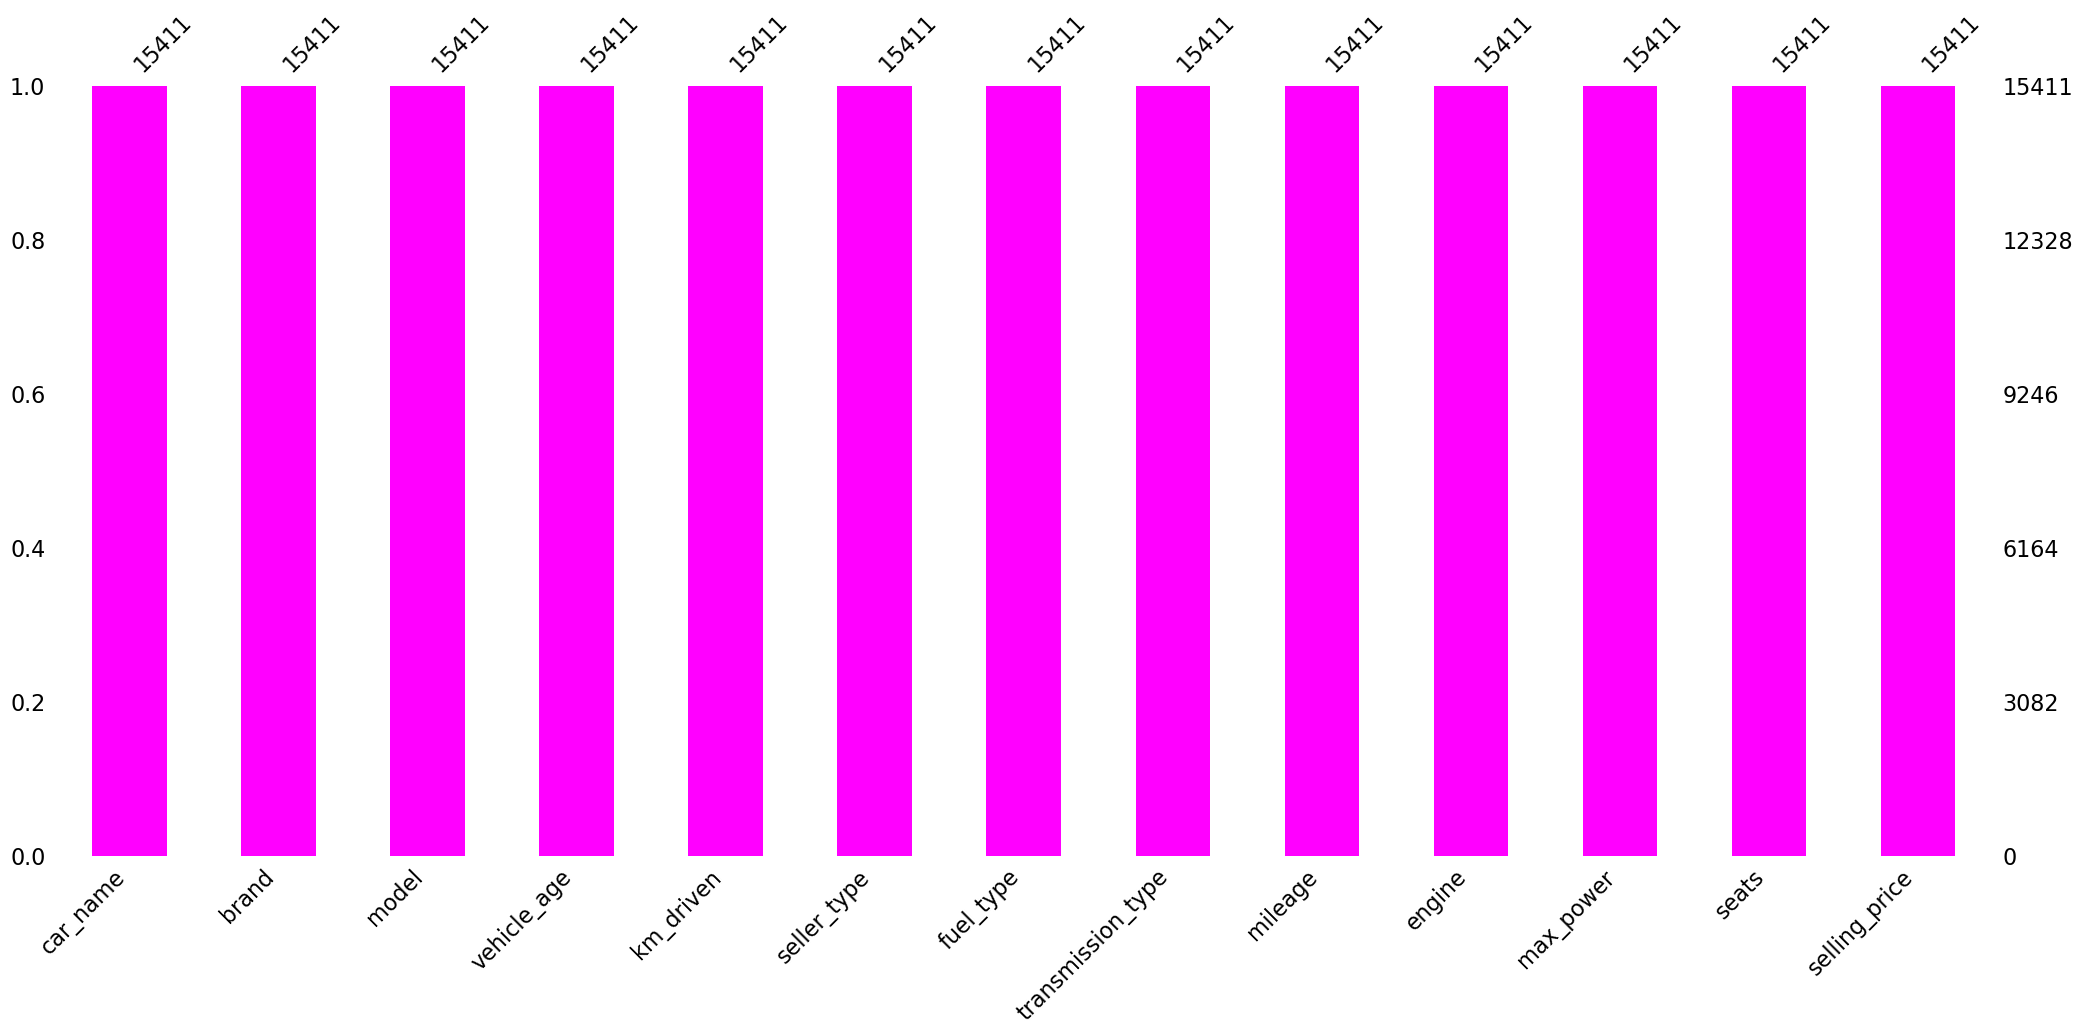

In [12]:
msno.bar(car_df_copy,color = (1,0,1))

## Insights:

Visualized that there are no null values in any of the features either.

In [13]:
# Check for duplicate values.

car_df_copy[car_df_copy.duplicated(keep='first')]

# By default, keep = first will keep the first occurrence as is and marks the remaining as duplicates.

car_name       brand        model  vehicle_age  km_driven  \
197            Honda City       Honda         City            8      70000   
360         Maruti Baleno      Maruti       Baleno            2       5000   
1353   Maruti Swift Dzire      Maruti  Swift Dzire            4      50000   
1429       Maruti Wagon R      Maruti      Wagon R           13     100000   
1485          Hyundai i20     Hyundai          i20            3      50000   
...                   ...         ...          ...          ...        ...   
15229        Maruti Swift      Maruti        Swift            8      80000   
15324      Maruti Wagon R      Maruti      Wagon R            6      50000   
15367          Tata Tiago        Tata        Tiago            4      30000   
15378       Hyundai Grand     Hyundai        Grand            6      30000   
15392    Land Rover Rover  Land Rover        Rover            5     128000   

      seller_type fuel_type transmission_type  mileage  engine  max_power  \
197    Individual    Petrol            Manual    16.80    1497     116.30   
360    Individual    Petrol         Automatic    21.40    1197      83.10   
1353   Individual    Diesel            Manual    28.40    1248      74.02   
1429   Individual    Petrol            Manual    18.90    1061      67.00   
1485   Individual    Petrol            Manual    18.60    1197      81.83   
...           ...       ...               ...      ...     ...        ...   
15229  Individual    Diesel            Manual    22.90    1248      74.00   
15324  Individual       CNG            Manual    26.60     998      58.16   
15367  Individual    Petrol            Manual    23.84    1199      84.00   
15378  Individual    Petrol            Manual    18.90    1197      82.00   
15392      Dealer    Diesel         Automatic    12.63    2179     147.50   

       seats  selling_price  
197        5         545000  
360        5         686000  
1353       5         680000  
1429       5         150000  
1485       5         625000  
...      ...            ...  
15229      5         350000  
15324      5         450000  
15367      5         350000  
15378      5         450000  
15392      5        2675000  

[167 rows x 13 columns]

In [14]:
# Total count of duplicate rows based on all features.

car_df_copy.duplicated().sum()

167

## Insights:

There are a total of 167 rows (excluding the first occurrence) as duplicates.

In [15]:
# To remove the duplicate rows excluding the first instance. (based on all columns)

car_df_copy.drop_duplicates(keep='first',inplace = True,ignore_index=True)

# ignore_index = True will ignore the previous index set and reset the new index from 0 to n-1.

In [16]:
car_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15244 entries, 0 to 15243
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15244 non-null  object 
 1   brand              15244 non-null  object 
 2   model              15244 non-null  object 
 3   vehicle_age        15244 non-null  int64  
 4   km_driven          15244 non-null  int64  
 5   seller_type        15244 non-null  object 
 6   fuel_type          15244 non-null  object 
 7   transmission_type  15244 non-null  object 
 8   mileage            15244 non-null  float64
 9   engine             15244 non-null  int64  
 10  max_power          15244 non-null  float64
 11  seats              15244 non-null  int64  
 12  selling_price      15244 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


## Observation:

Indexes are reset from 0 to 15243.

In [17]:
car_df_copy.head()

car_name    brand     model  vehicle_age  km_driven seller_type  \
0    Maruti Alto   Maruti      Alto            9     120000  Individual   
1  Hyundai Grand  Hyundai     Grand            5      20000  Individual   
2    Hyundai i20  Hyundai       i20           11      60000  Individual   
3    Maruti Alto   Maruti      Alto            9      37000  Individual   
4  Ford Ecosport     Ford  Ecosport            6      30000      Dealer   

  fuel_type transmission_type  mileage  engine  max_power  seats  \
0    Petrol            Manual    19.70     796      46.30      5   
1    Petrol            Manual    18.90    1197      82.00      5   
2    Petrol            Manual    17.00    1197      80.00      5   
3    Petrol            Manual    20.92     998      67.10      5   
4    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         215000  
3         226000  
4         570000

## Observation:

car_name & brand features are not necessary (redundant features) as the model will be able to predict the selling_price based on model feature.

In [18]:
# Dropping the features car_name & brand.

car_df_copy = car_df_copy.drop(columns=['car_name','brand'],axis = 1)

In [19]:
car_df_copy.head()

model  vehicle_age  km_driven seller_type fuel_type transmission_type  \
0      Alto            9     120000  Individual    Petrol            Manual   
1     Grand            5      20000  Individual    Petrol            Manual   
2       i20           11      60000  Individual    Petrol            Manual   
3      Alto            9      37000  Individual    Petrol            Manual   
4  Ecosport            6      30000      Dealer    Diesel            Manual   

   mileage  engine  max_power  seats  selling_price  
0    19.70     796      46.30      5         120000  
1    18.90    1197      82.00      5         550000  
2    17.00    1197      80.00      5         215000  
3    20.92     998      67.10      5         226000  
4    22.77    1498      98.59      5         570000

In [20]:
# Check the list of numerical, categorical, discrete & continuous features.

numerical_features = [feature for feature in car_df_copy.columns if car_df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in car_df_copy.columns if car_df_copy[feature].dtype == 'O']
discrete_features = [feature for feature in numerical_features if car_df_copy[feature].nunique() <= 25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]

## Point to Note:
1. Discrete & continuous features are always part of numerical features.

In [21]:
# Display the features list.

print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')
print(f'Discrete Features : {discrete_features}')
print(f'Continuous Features : {continuous_features}')

Numerical Features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
Categorical Features : ['model', 'seller_type', 'fuel_type', 'transmission_type']
Discrete Features : ['vehicle_age', 'seats']
Continuous Features : ['km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


In [22]:
car_df_copy.head()

model  vehicle_age  km_driven seller_type fuel_type transmission_type  \
0      Alto            9     120000  Individual    Petrol            Manual   
1     Grand            5      20000  Individual    Petrol            Manual   
2       i20           11      60000  Individual    Petrol            Manual   
3      Alto            9      37000  Individual    Petrol            Manual   
4  Ecosport            6      30000      Dealer    Diesel            Manual   

   mileage  engine  max_power  seats  selling_price  
0    19.70     796      46.30      5         120000  
1    18.90    1197      82.00      5         550000  
2    17.00    1197      80.00      5         215000  
3    20.92     998      67.10      5         226000  
4    22.77    1498      98.59      5         570000

In [23]:
# Let's check which model has highest frequency in this dataset.

car_df_copy['model'].value_counts()

i20             898
Swift Dzire     875
Swift           774
Alto            768
City            750
               ... 
Ghibli            1
C                 1
Ghost             1
Quattroporte      1
Gurkha            1
Name: model, Length: 120, dtype: int64

In [24]:
# To display only the models from the above value_counts()

car_df_copy['model'].value_counts().index

Index(['i20', 'Swift Dzire', 'Swift', 'Alto', 'City', 'Wagon R', 'Grand',
       'Innova', 'Verna', 'i10',
       ...
       'NX', 'RX', 'GTC4Lusso', 'Aura', 'Altroz', 'Ghibli', 'C', 'Ghost',
       'Quattroporte', 'Gurkha'],
      dtype='object', length=120)

In [25]:
# To display only the count for each model from the above value_counts()

car_df_copy['model'].value_counts().values

array([898, 875, 774, 768, 750, 709, 569, 544, 488, 406, 371, 369, 362,
       360, 343, 341, 335, 327, 299, 289, 271, 269, 245, 234, 216, 207,
       187, 182, 175, 152, 142, 138, 124, 123, 117, 116, 101,  97,  96,
        93,  85,  84,  75,  71,  64,  64,  63,  61,  59,  58,  57,  54,
        51,  50,  50,  42,  41,  39,  37,  36,  36,  36,  33,  31,  28,
        28,  27,  25,  24,  23,  23,  20,  19,  17,  17,  17,  17,  16,
        15,  13,  12,  12,  10,  10,   9,   8,   8,   7,   7,   6,   6,
         6,   6,   5,   5,   4,   4,   4,   4,   4,   3,   3,   3,   3,
         3,   3,   3,   2,   2,   2,   2,   2,   1,   1,   1,   1,   1,
         1,   1,   1], dtype=int64)

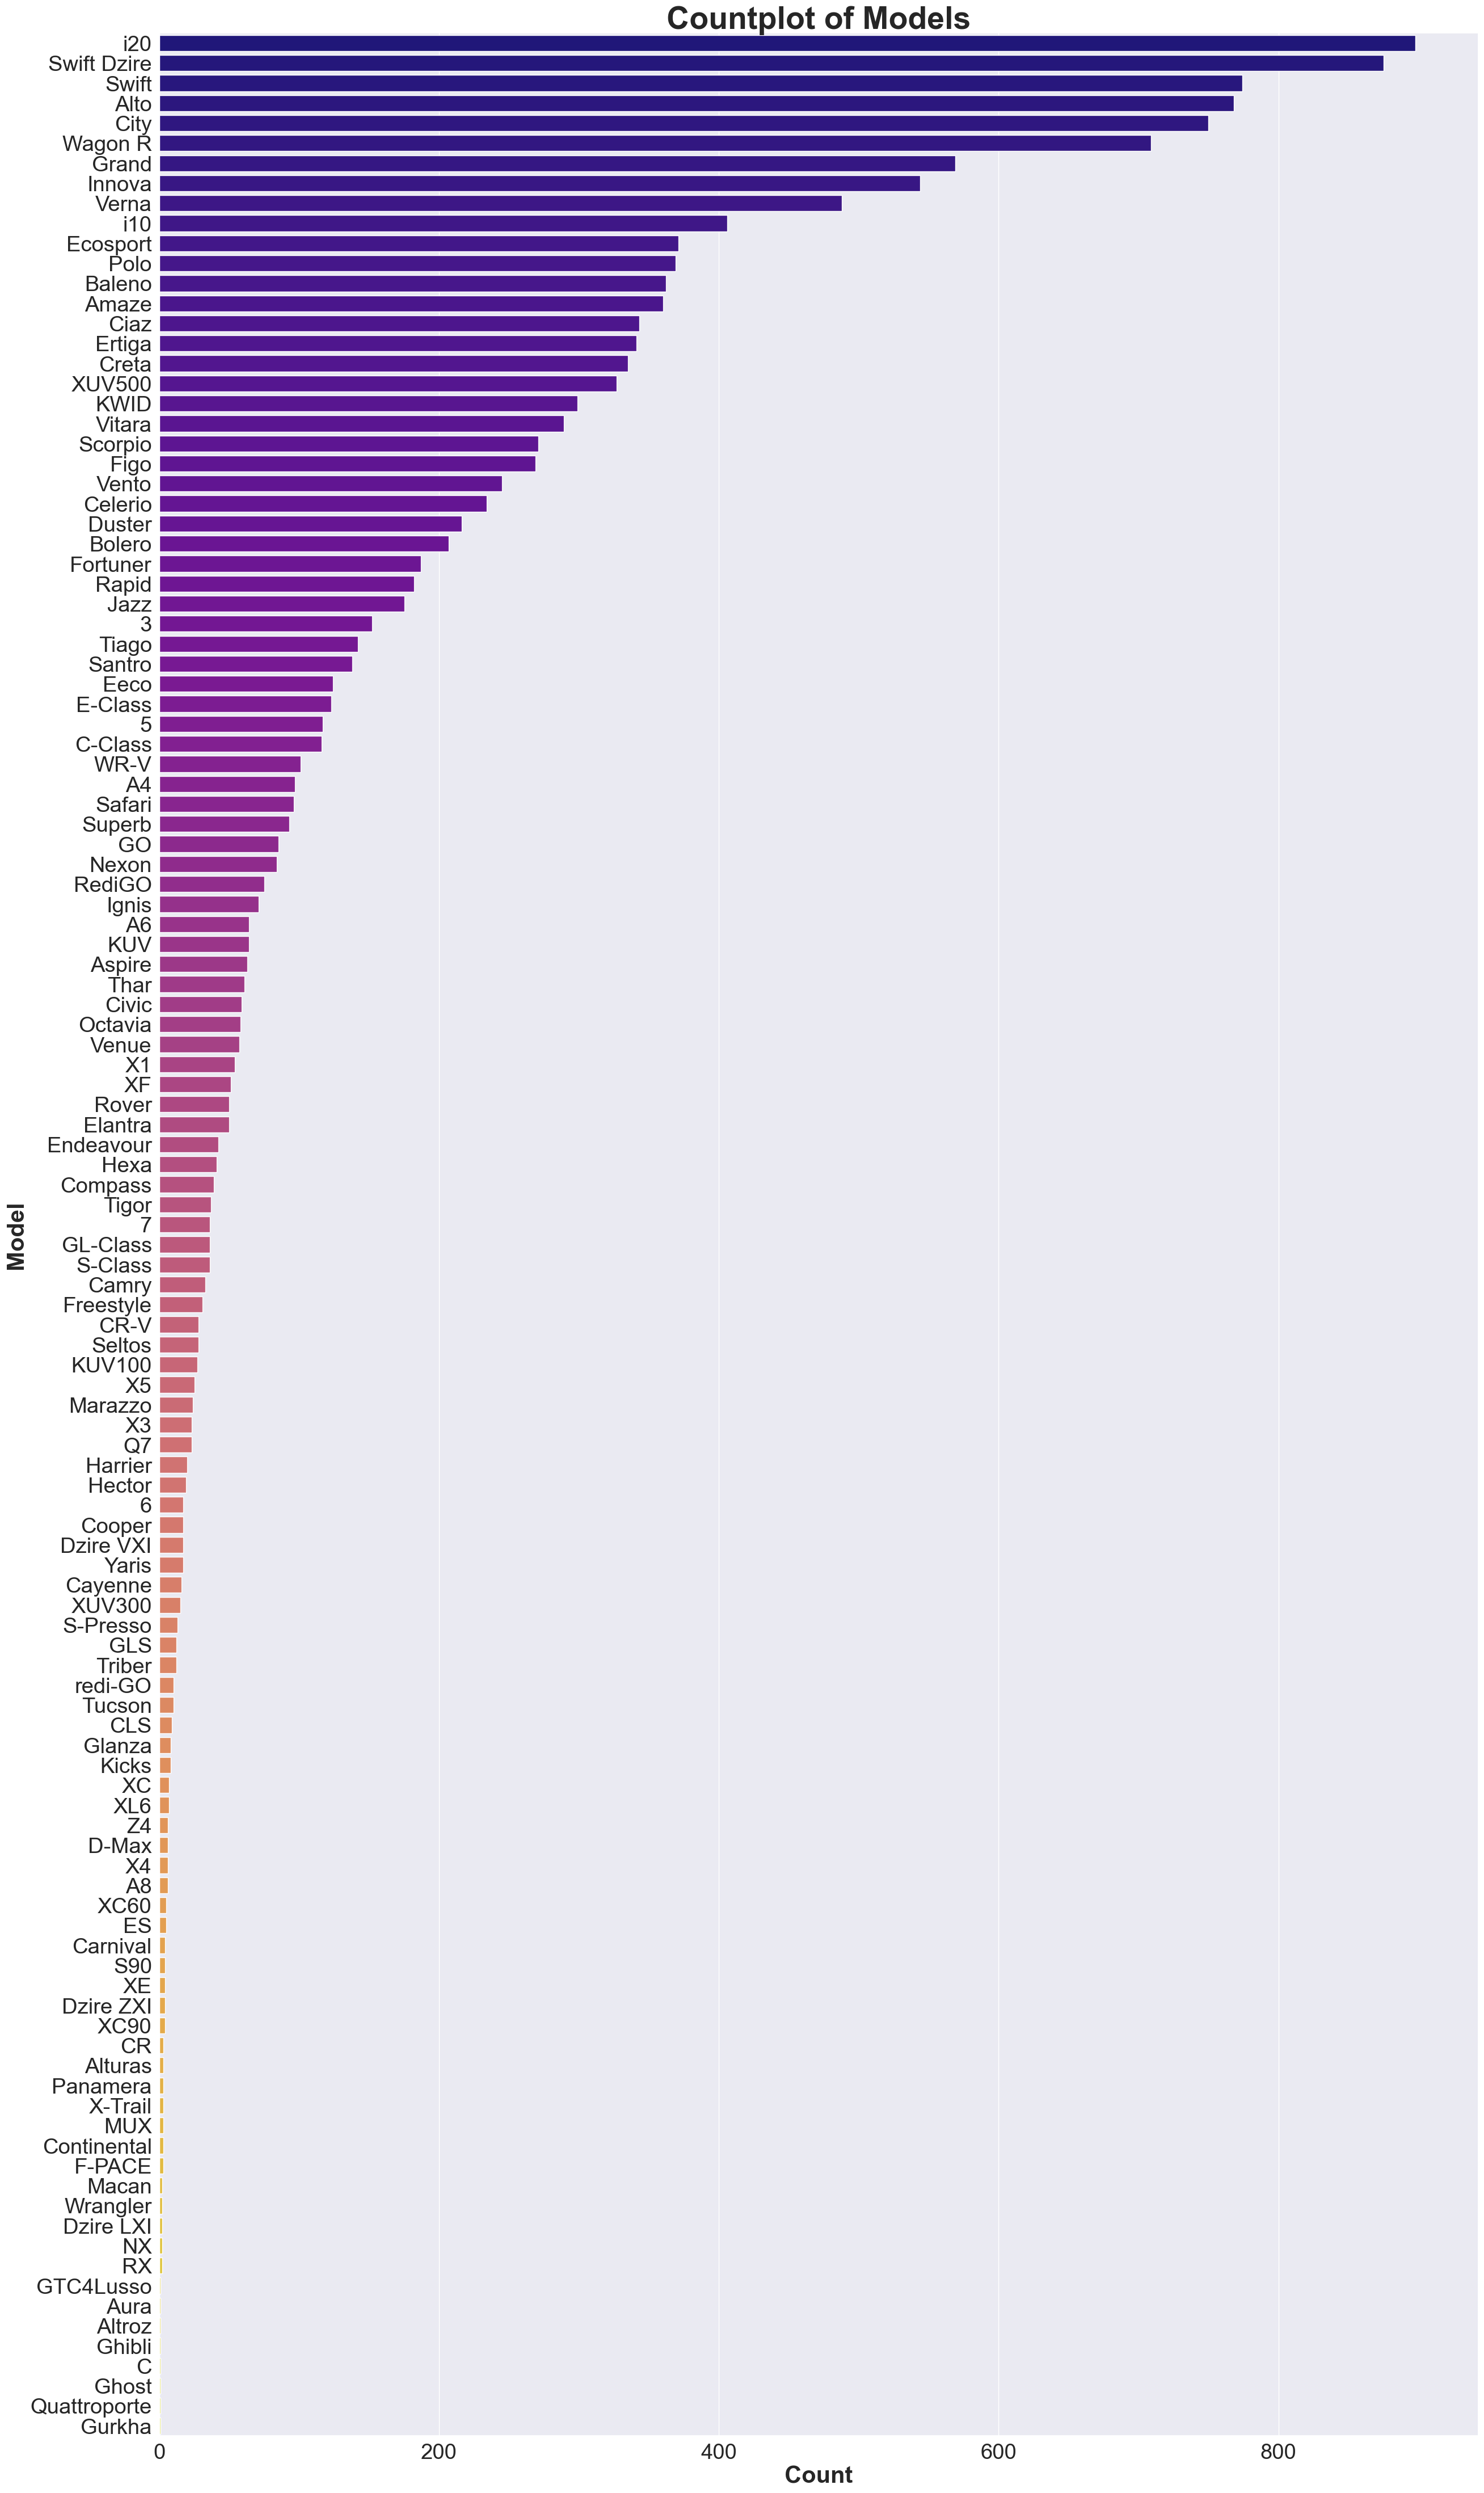

In [26]:
# Let's visualize the above using count plot.

plt.figure(figsize = (30,55))
sns.set(font_scale = 2.5)
plt.title('Countplot of Models', fontsize = 40, fontweight = 'bold')
sns.countplot(y='model',data = car_df_copy, palette = 'plasma', order = car_df_copy['model'].value_counts().index)
plt.xlabel('Count', fontsize = 30,fontweight = 'bold')
plt.ylabel('Model', fontsize = 30,fontweight = 'bold')
plt.show()

## Insights:

Model i20 has the highest frequency in the dataset whereas model Gurkha has the lowest frequency.

In [27]:
# Let's evaluate the count of i20 using groupby and where clause.

# SELECT COUNT(MODEL), MODEL
# FROM CAR_DF_COPY
# WHERE MODEL = 'I20'
# GROUPBY MODEL

car_df_copy[car_df_copy['model'] == 'i20'].groupby(['model'])['model'].count().reset_index(name = 'Count')

model  Count
0   i20    898

In [28]:
# Let's evaluate the model that has highest selling price.

# SELECT MAX(SELLING_PRICE),MODEL
# FROM CAR_DF_COPY
# GROUP BY MODEL
# ORDER BY MAX(SELLING_PRICE)

car_df_copy.groupby(['model'])['selling_price'].max().sort_values(ascending=False).reset_index(name = 'Max Selling Price')

model  Max Selling Price
0      GTC4Lusso           39500000
1          Ghost           24200000
2    Continental           14500000
3        S-Class           13000000
4        Cayenne           11100000
..           ...                ...
115          i10             500000
116         Eeco             490000
117         Alto             485000
118      redi-GO             435000
119       RediGO             425000

[120 rows x 2 columns]

## Insights:

GTC4Lusso has the highest selling amongst all others whereas RediGO has the lowest selling price.

In [29]:
# Let's try to use aggregate function to fetch mean, median, max, min selling price for the model feature.

# SELECT MODEL, AVG(SELLING_PRICE), MIN(SELLING_PRICE),
# MAX(SELLING_PRICE), COUNT(MODEL)
# FROM CAR_DF_COPY
# GROUPBY MODEL

car_df_copy.groupby(['model'])['selling_price'].agg(['mean','median','max','min','count']).reset_index().sort_values(ascending=False,by = 'max')

model          mean      median       max       min  count
50     GTC4Lusso  3.950000e+07  39500000.0  39500000  39500000      1
52         Ghost  2.420000e+07  24200000.0  24200000  24200000      1
28   Continental  9.266667e+06   8100000.0  14500000   5200000      3
80       S-Class  3.630917e+06   2450000.0  13000000    625000     36
22       Cayenne  5.077500e+06   4750000.0  11100000   2000000     16
..           ...           ...         ...       ...       ...    ...
117          i10  2.795493e+05    275000.0    500000    100000    406
39          Eeco  3.344677e+05    349000.0    490000    130000    124
7           Alto  2.451393e+05    250000.0    485000     45000    768
119      redi-GO  3.212000e+05    325000.0    435000    249000     10
78        RediGO  2.793600e+05    270000.0    425000    170000     75

[120 rows x 6 columns]

In [30]:
# Let's perform descriptive statistics for this dataset.

car_df_copy.describe(include = 'all').T

count unique     top   freq           mean  \
model                15244    120     i20    898            NaN   
vehicle_age        15244.0    NaN     NaN    NaN       6.041131   
km_driven          15244.0    NaN     NaN    NaN   55639.582327   
seller_type          15244      3  Dealer   9459            NaN   
fuel_type            15244      5  Petrol   7555            NaN   
transmission_type    15244      2  Manual  12094            NaN   
mileage            15244.0    NaN     NaN    NaN      19.697333   
engine             15244.0    NaN     NaN    NaN    1486.171543   
max_power          15244.0    NaN     NaN    NaN     100.607652   
seats              15244.0    NaN     NaN    NaN       5.326161   
selling_price      15244.0    NaN     NaN    NaN  774701.448111   

                             std      min       25%       50%       75%  \
model                        NaN      NaN       NaN       NaN       NaN   
vehicle_age             3.016228      0.0       4.0       6.0       8.0   
km_driven           51766.299327    100.0   30000.0   50000.0   70000.0   
seller_type                  NaN      NaN       NaN       NaN       NaN   
fuel_type                    NaN      NaN       NaN       NaN       NaN   
transmission_type            NaN      NaN       NaN       NaN       NaN   
mileage                 4.169307      4.0      17.0     19.67      22.7   
engine                 520.41939    793.0    1197.0    1248.0    1582.0   
max_power              42.915687     38.4      74.0      88.5     117.3   
seats                    0.80876      0.0       5.0       5.0       5.0   
selling_price      894676.081921  40000.0  385000.0  559000.0  825000.0   

                          max  
model                     NaN  
vehicle_age              29.0  
km_driven           3800000.0  
seller_type               NaN  
fuel_type                 NaN  
transmission_type         NaN  
mileage                 33.54  
engine                 6592.0  
max_power               626.0  
seats                     9.0  
selling_price      39500000.0

## Insights:

1. model - This categorical feature has 120 unique categories of which i20 model has the highest frequency.
2. vehicle_age - On an avg, 6 yrs old cars were sold with a std dev of 3. This denotes that, if the vehicle age distribution is normal with mean value of 6 years, then 68% of data will be mean - 3 years & mean + 3 years which means 68% of data will be between 3years & 9years.
3. km_driven - possibility of outliers in this feature as the data points are far away from mean (higher std dev.)
4. seller_type - categorical feature which has 3 unique categories of which dealer has bought the most no. of resale cars.
5. fuel_type - categorical feature which has 5 unique categories of which most of the cars use petrol.
6. transmission_type - categorical feature which has 2 unique categories of which most of the cars are manual.
7. mileage - On an avg, these cars give 19.7km/L with a std dev of 4.17km/L. This denotes that, if the mileage distribution is normal with mean of 19.7km/L, then 68% of data will be mean - 4.17km/L & mean + 4.17km/L which mean 68% of data will be between 15.53km/L & 23.87km/L.
8. engine - On an avg, these cars' engines will provide 1468 HP with a std dev of 520.42 HP. This denotes that, if the engine distribution is normal with mean of 1468 HP, then 68% of data will be mean - 520.42 HP & mean + 520.42 HP.
9. selling_price - target feature that has more deviations with respect to mean.

In [31]:
car_df_copy.head()

model  vehicle_age  km_driven seller_type fuel_type transmission_type  \
0      Alto            9     120000  Individual    Petrol            Manual   
1     Grand            5      20000  Individual    Petrol            Manual   
2       i20           11      60000  Individual    Petrol            Manual   
3      Alto            9      37000  Individual    Petrol            Manual   
4  Ecosport            6      30000      Dealer    Diesel            Manual   

   mileage  engine  max_power  seats  selling_price  
0    19.70     796      46.30      5         120000  
1    18.90    1197      82.00      5         550000  
2    17.00    1197      80.00      5         215000  
3    20.92     998      67.10      5         226000  
4    22.77    1498      98.59      5         570000

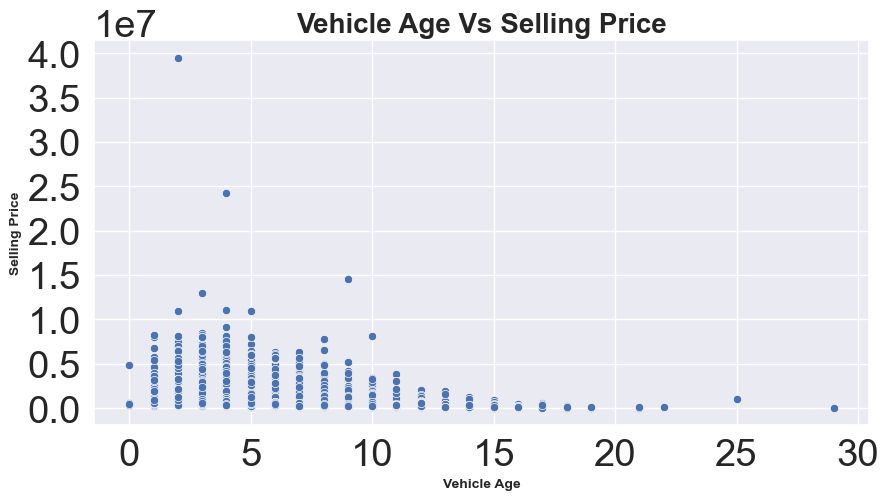

In [32]:
# vehicle_age feature analysis.

# Visualization of vehicle_age Vs sellling_price.

plt.figure(figsize = (10,5))
plt.title('Vehicle Age Vs Selling Price', fontsize = 20, fontweight = 'bold')
sns.set(font_scale = 0.5)
sns.scatterplot(x = 'vehicle_age', y = 'selling_price', data = car_df_copy, palette = 'plasma', markers = '*')
plt.xlabel('Vehicle Age', fontsize = 10, fontweight = 'bold')
plt.ylabel('Selling Price', fontsize = 10, fontweight = 'bold')
plt.show()

## Insights:

1. Vehicle age of 2 yrs has the maximum selling price whereas vehicle age of around 21 yrs has the least selling price. So,    we can infer that, the newer vehicles are quoted with maximum resale price.
2. Almost all the cars based on vehicle age,the selling prices are almost similar with few deviations. For ex, vehicle age with 5 years are with selling prices ranging between 0.1 * 10^7 and 1.2 * 10^7.

In [33]:
car_df_copy[['selling_price']].max()

selling_price    39500000
dtype: int64

In [34]:
car_df_copy[car_df_copy['selling_price']== 39500000]

model  vehicle_age  km_driven seller_type fuel_type  \
3785  GTC4Lusso            2       3800      Dealer    Petrol   

     transmission_type  mileage  engine  max_power  seats  selling_price  
3785         Automatic      4.0    3855      601.0      4       39500000

In [35]:
car_df_copy[['selling_price']].min()

selling_price    40000
dtype: int64

In [36]:
car_df_copy[car_df_copy['selling_price'] == 40000]

model  vehicle_age  km_driven seller_type fuel_type transmission_type  \
7558  Wagon R           21      80000  Individual    Petrol            Manual   

      mileage  engine  max_power  seats  selling_price  
7558     18.9     998       67.1      5          40000

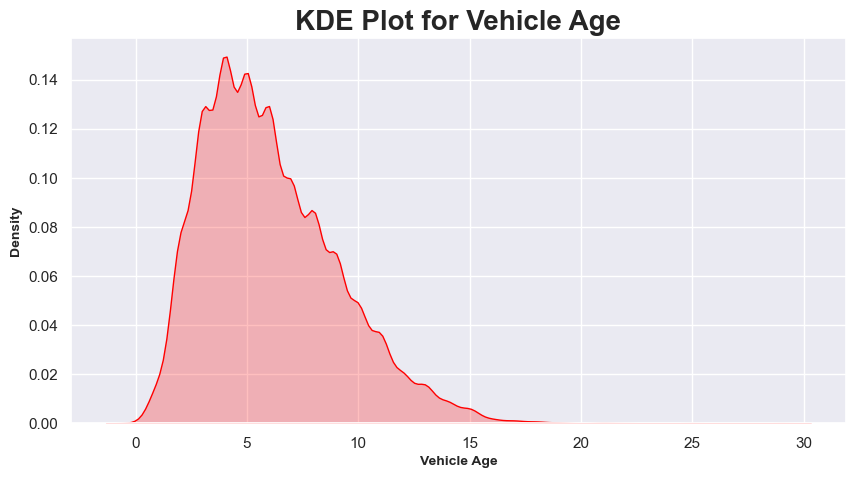

In [37]:
# Let's visualize kde plot for vehicle_age feature.

plt.figure(figsize = (10,5))
sns.set(font_scale = 1.0)
plt.title('KDE Plot for Vehicle Age', fontsize = 20, fontweight = 'bold')
sns.kdeplot(x = 'vehicle_age', data = car_df_copy, color = 'red', fill = True)
plt.xlabel('Vehicle Age', fontsize = 10, fontweight = 'bold')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold')
plt.show()

## Insights:

1. The plot is not exactly symmetrically/normally distributed which denotes that there are some skewness (outliers)            observed in vehicle_age feature.
2. The peak value of greater than 0.14 PDF (Density) denotes that there is >14% probability that vehicles are in and around the age of 5 yrs.

In [38]:
# Let's analyze the min, max, mean, median selling prices based on vehicle age.

# SELECT VEHICLE_AGE, MIN(SELLING_PRICE),
# MAX(SELLING_PRICE), AVG(SELLING_PRICE)
# FROM CAR_DF_COPY
# GROUPBY VEHICLE_AGE
# ORDER BY MAX(SELLING_PRICE)

car_df_copy.groupby('vehicle_age')['selling_price'].agg(['min','max','mean','median']).reset_index().sort_values(ascending=False,by = 'max')

vehicle_age      min       max          mean     median
2             2   260000  39500000  1.144514e+06   820000.0
4             4   200000  24200000  9.490419e+05   695500.0
9             9   120000  14500000  5.930089e+05   400000.0
3             3   210000  13000000  9.773270e+05   748000.0
5             5   170000  11000000  8.202058e+05   600000.0
1             1   290000   8250000  1.096977e+06   750000.0
10           10   120000   8100000  4.964660e+05   335500.0
8             8   150000   7800000  6.275114e+05   450000.0
6             6   200000   6300000  7.281607e+05   550000.0
7             7   166000   6300000  7.000722e+05   500000.0
0             0   400000   4850000  1.575000e+06   525000.0
11           11   110000   3800000  4.291072e+05   295000.0
12           12    90000   2000000  3.182901e+05   260000.0
13           13    80000   1975000  2.739402e+05   210000.0
14           14    60000   1285000  2.606822e+05   190000.0
22           25  1000000   1000000  1.000000e+06  1000000.0
15           15    55000    925000  1.883764e+05   142500.0
17           17    45000    525000  1.564706e+05   110000.0
16           16    65000    421000  1.262400e+05   100000.0
18           18    65000    275000  1.250000e+05   100000.0
19           19    50000    100000  7.400000e+04    80000.0
20           21    40000     95000  7.333333e+04    85000.0
21           22    70000     70000  7.000000e+04    70000.0
23           29    60000     60000  6.000000e+04    60000.0

## Insights:

The data is sorted in descending order based on a maximum selling price.

1. Vehcile with age of 29 yrs is with only 1 record (possibly an outlier) as the min and max values are same.


In [39]:
car_df_copy.head()

model  vehicle_age  km_driven seller_type fuel_type transmission_type  \
0      Alto            9     120000  Individual    Petrol            Manual   
1     Grand            5      20000  Individual    Petrol            Manual   
2       i20           11      60000  Individual    Petrol            Manual   
3      Alto            9      37000  Individual    Petrol            Manual   
4  Ecosport            6      30000      Dealer    Diesel            Manual   

   mileage  engine  max_power  seats  selling_price  
0    19.70     796      46.30      5         120000  
1    18.90    1197      82.00      5         550000  
2    17.00    1197      80.00      5         215000  
3    20.92     998      67.10      5         226000  
4    22.77    1498      98.59      5         570000

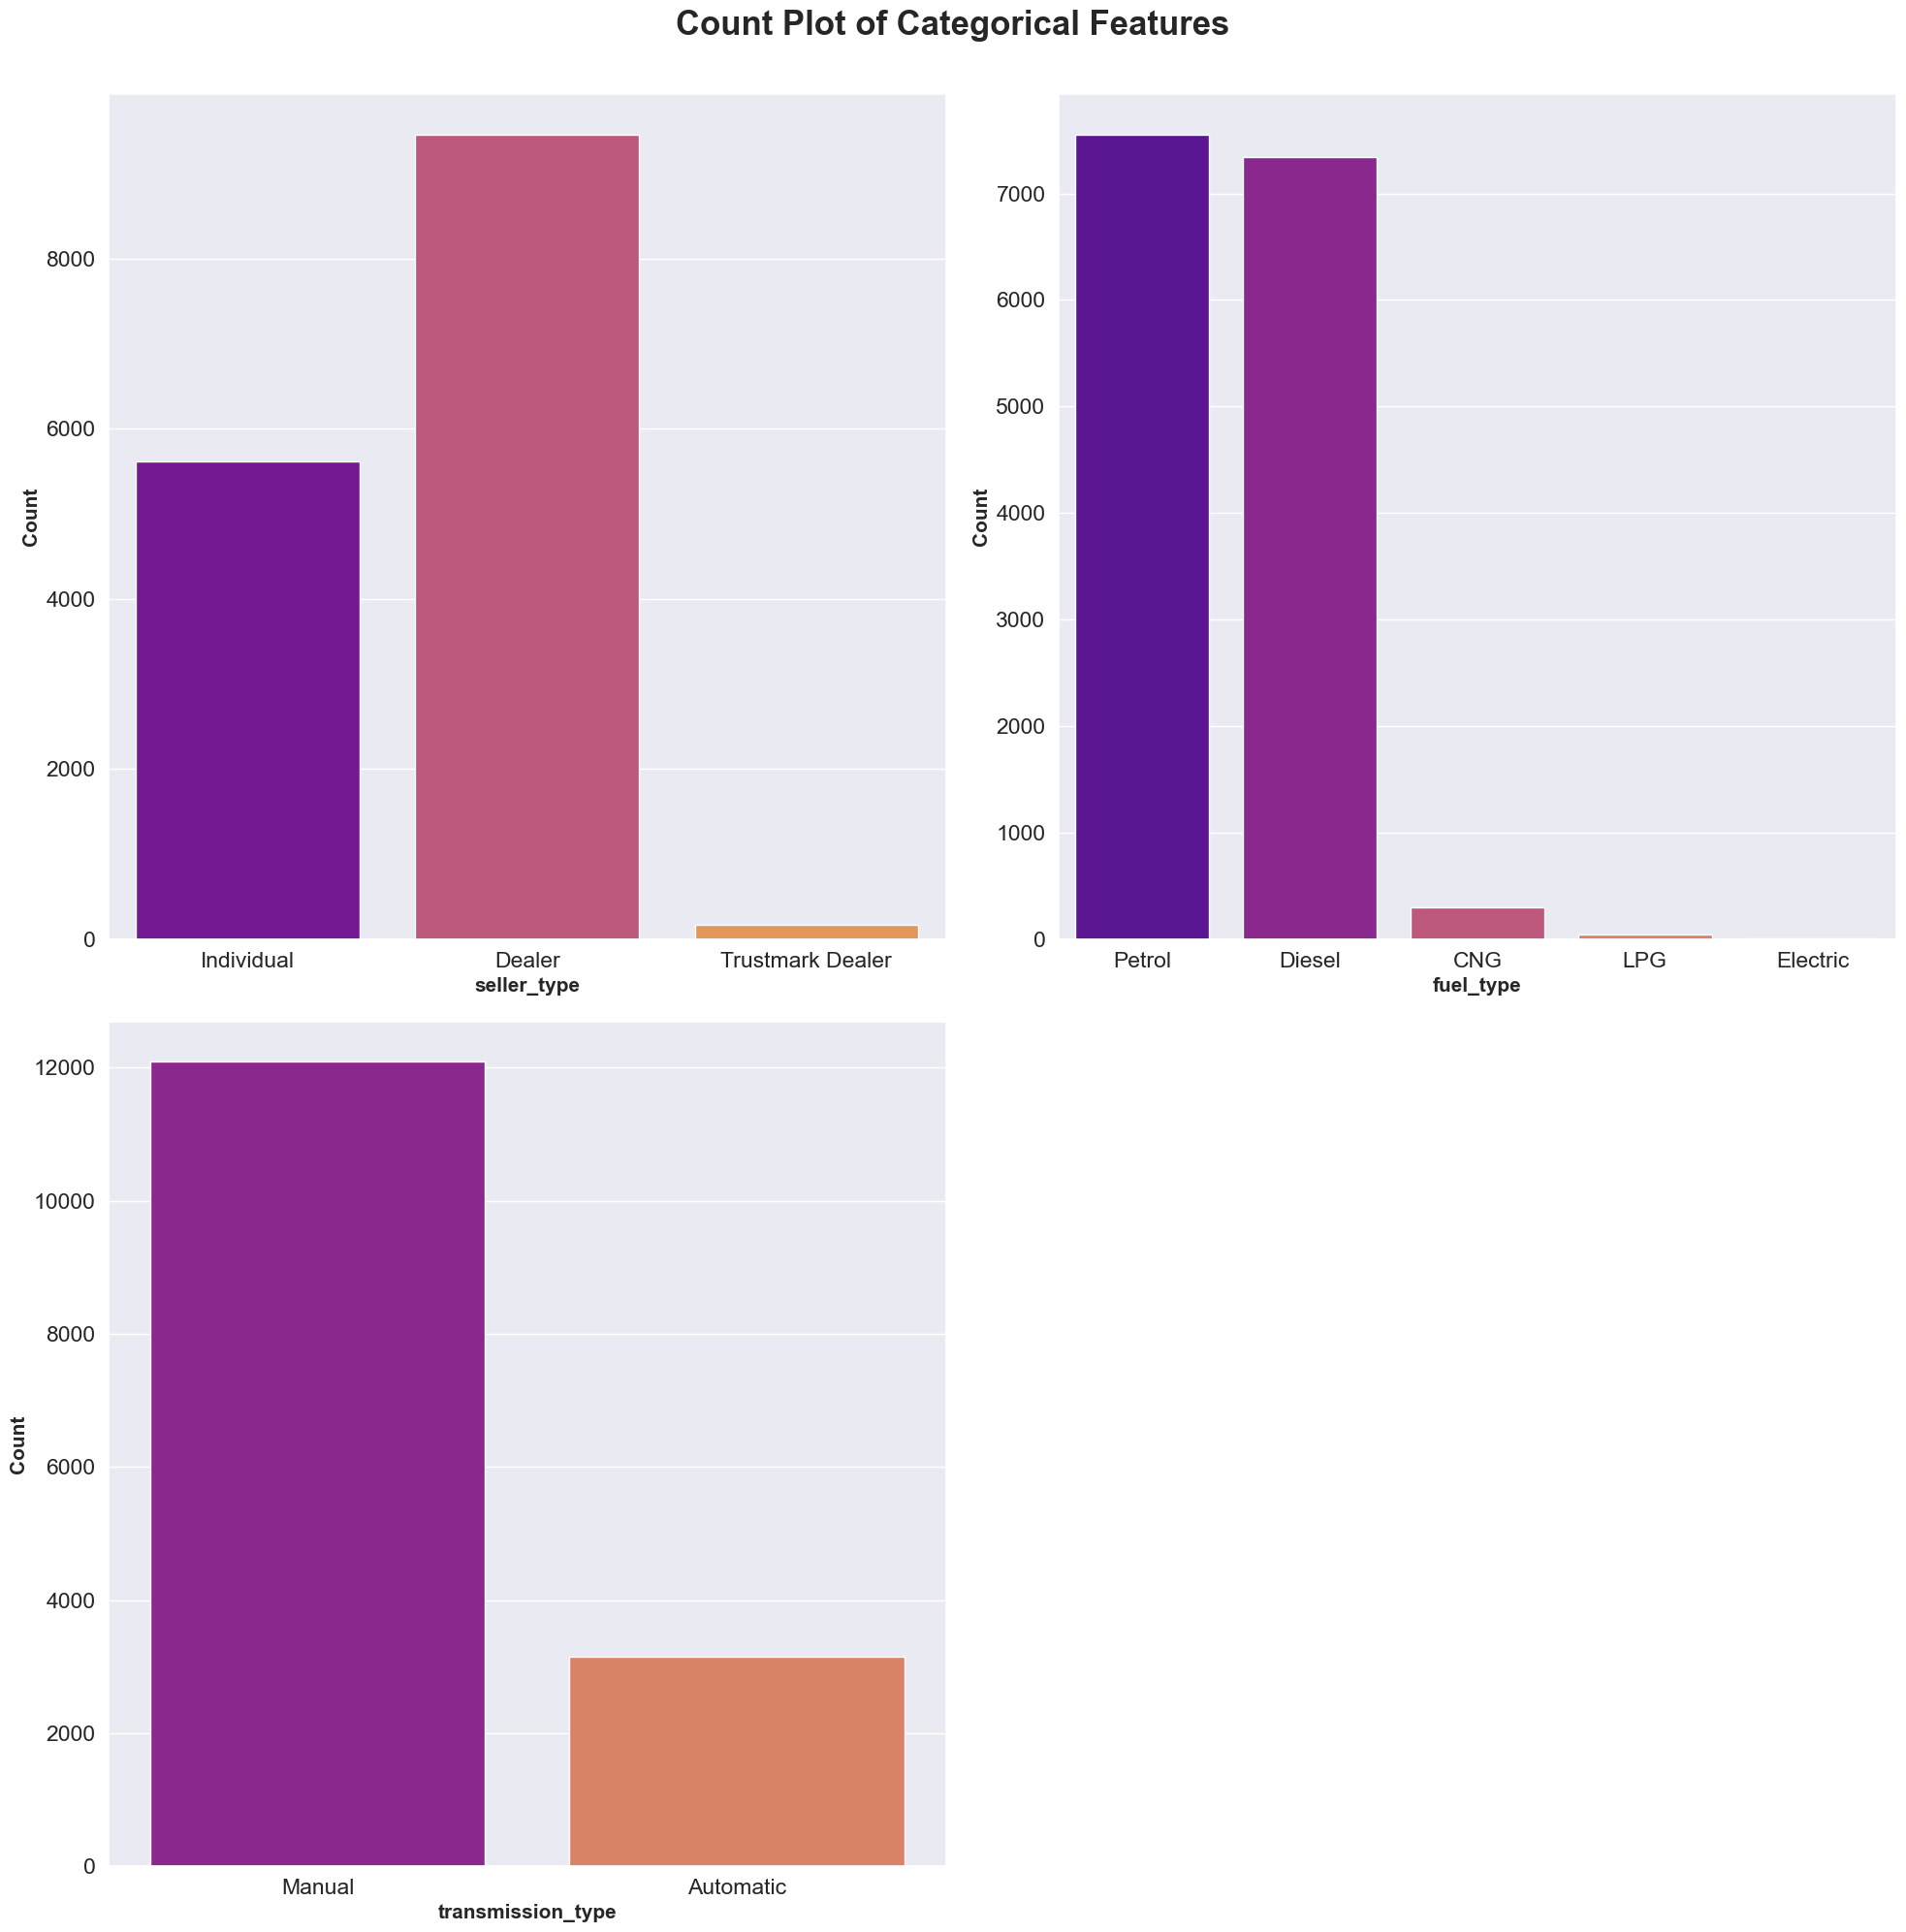

In [40]:
# Let's visualize the categorical features using count plot.

categorical_features

plt.figure(figsize = (20,20))
plt.suptitle('Count Plot of Categorical Features', fontsize = 25, fontweight = 'bold', alpha = 1, y = 1)
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)

for idx,col in enumerate(categorical_features):
    if col != 'model':
        plt.subplot(2,2,idx)
        sns.countplot(x = col, data = car_df_copy, palette = 'plasma')
        plt.xlabel(col, fontsize = 15, fontweight = 'bold')
        plt.ylabel('Count', fontsize = 15, fontweight = 'bold')
plt.tight_layout()
plt.show()

## Insights:

1. seller_type - Dealer is selling most no. of used cars whereas trustmark dealers sell the least.
2. fuel_type - petrol type cars are most no. of cars that were sold whereas electric cars were least sold.
3. transmission_type - Manual type cars were sold the most whereas automatic type cars were sold less comparatively.

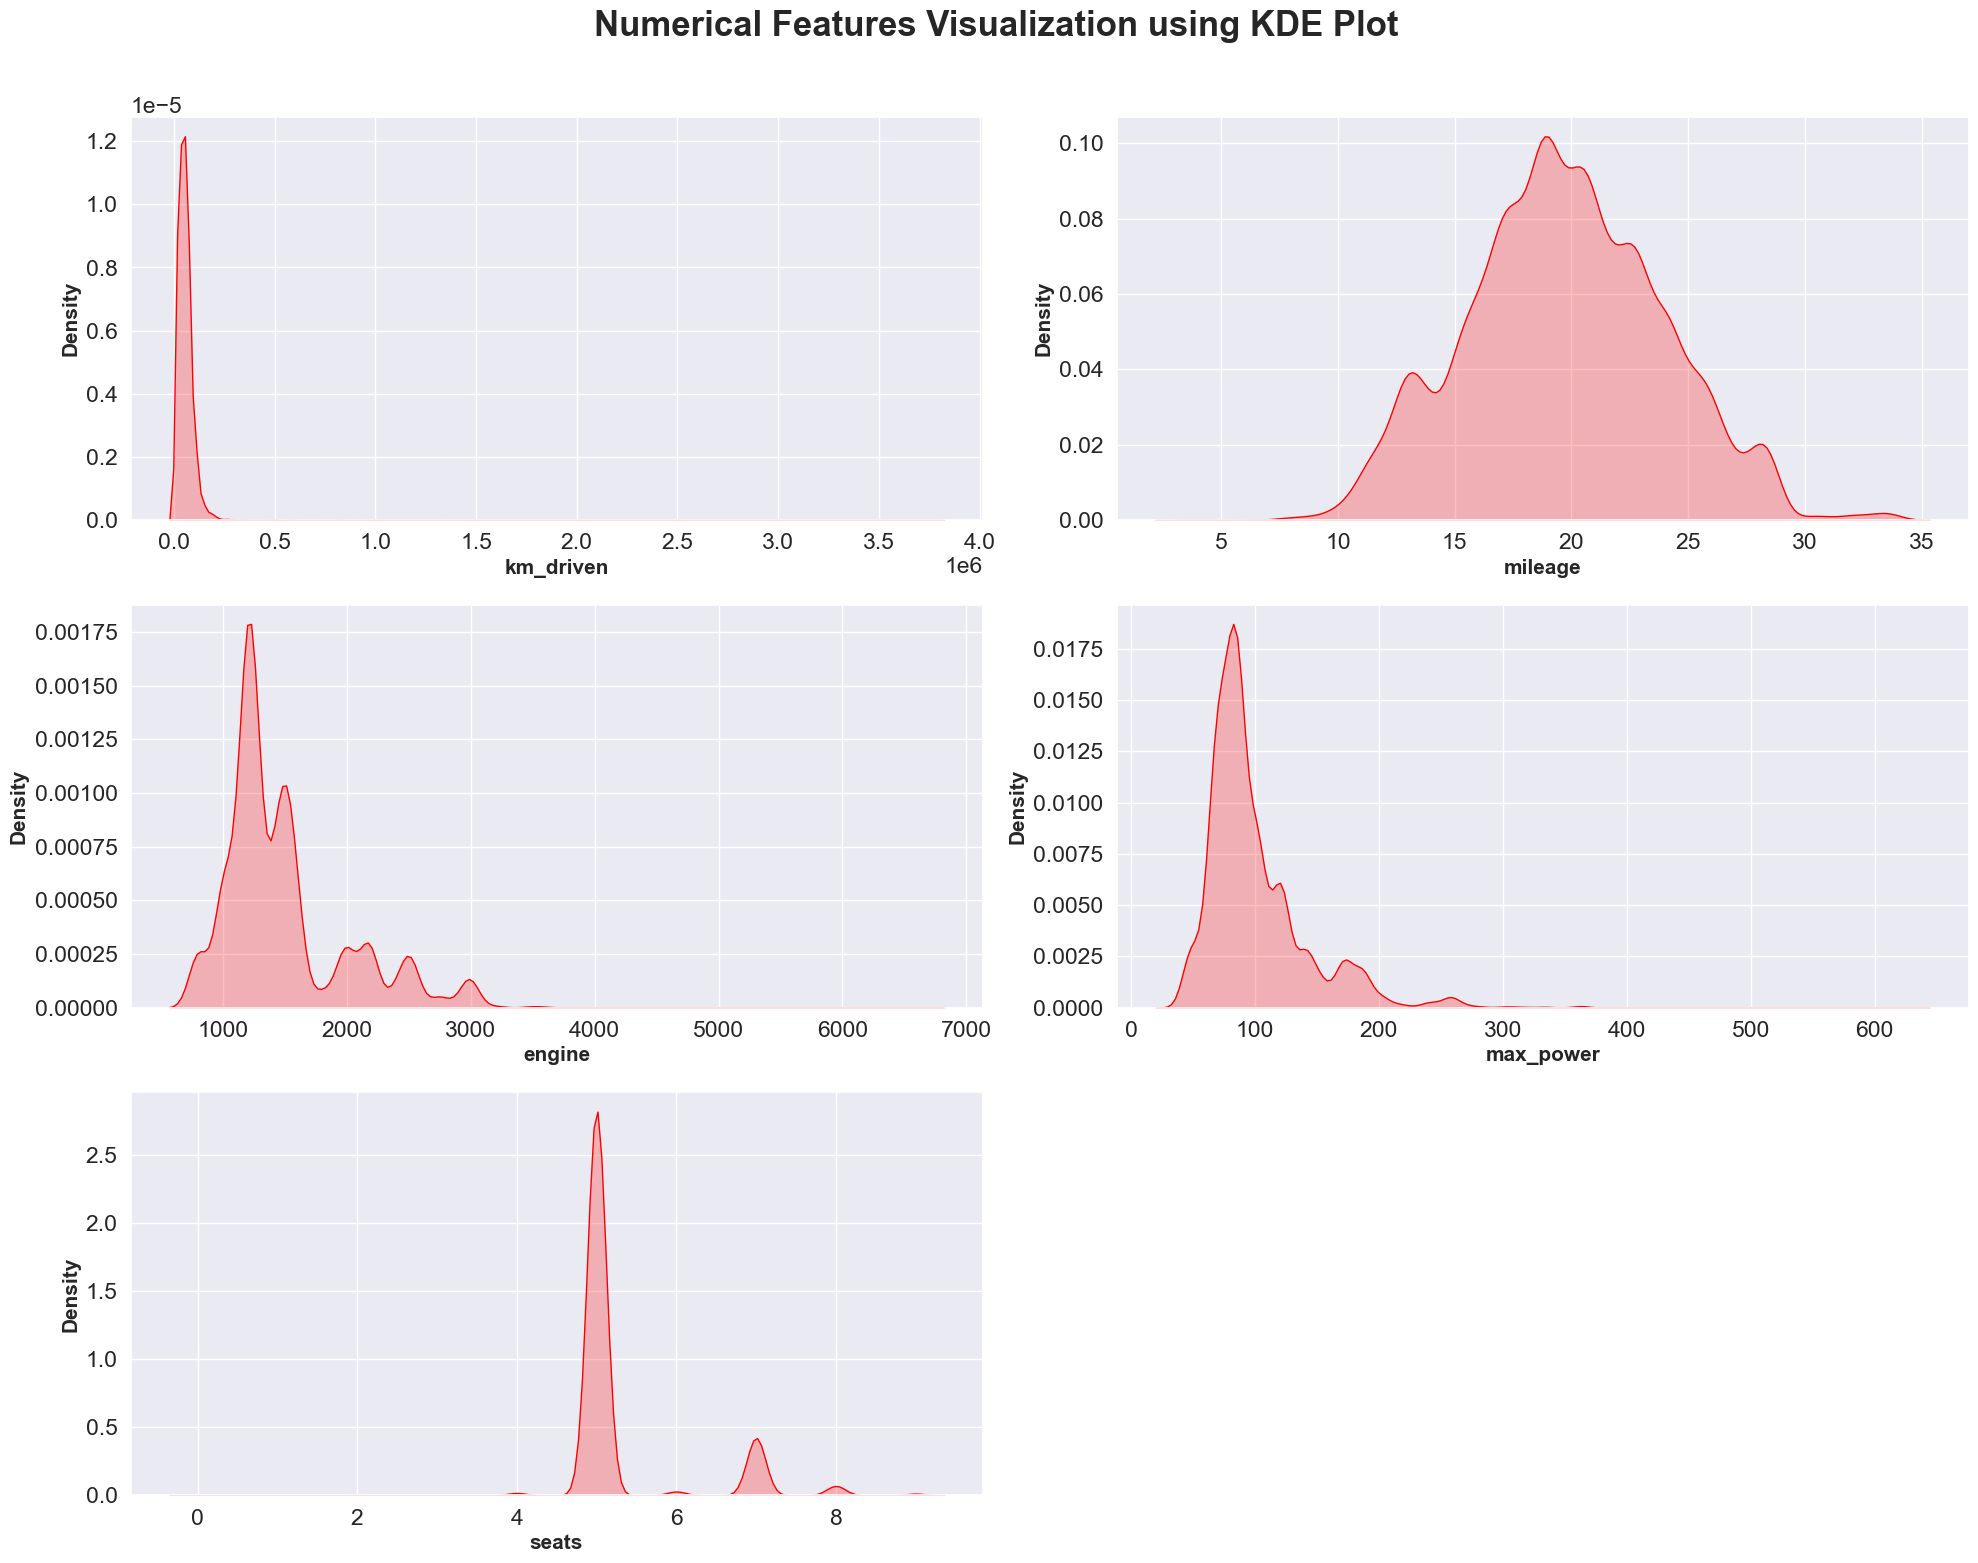

In [41]:
# Let's visualize the numerical features using kde plot.

plt.figure(figsize=(20,20))
plt.suptitle('Numerical Features Visualization using KDE Plot', fontsize = 25, fontweight = 'bold', alpha = 1, y = 1)
sns.set_style('whitegrid')
sns.set(font_scale=1.5)

for idx,col in enumerate(numerical_features):
    if col != 'vehicle_age' and col != 'selling_price':
        plt.subplot(4,2,idx)
        sns.kdeplot(x = col, data = car_df_copy, color = 'red', fill = True)
        plt.xlabel(col, fontsize = 15, fontweight = 'bold')
        plt.ylabel('Density', fontsize = 15, fontweight = 'bold')
plt.tight_layout()
plt.show()

## Insights:

1. km_driven - the distribution is right skewed which denotes that there are possibilities of outlier being present. The distribution is also narrow which also denotes that the data points are more closer (low variance) to the mean value which in turn results in lower std dev. square root/cube root/log normal transformation needs to be applied to convert right skewed to normal distribution.
2. mileage   - the dist. is approximately normally distributed with mean value closer to 20km/L.
3. engine    - kind of multimodal KDE plot.
4. max_power - kind of right skewed dist. which denotes that there are possibilities of outlier being present. Square root/cube root/log normal transformation needs to be applied to convert into a normal distribution.
5. seats     - bimodal kind of dist. where most no. of cars that are being sold are with 5 & 7 seater.

In [42]:
car_df_copy.describe().T

count           mean            std      min       25%  \
vehicle_age    15244.0       6.041131       3.016228      0.0       4.0   
km_driven      15244.0   55639.582327   51766.299327    100.0   30000.0   
mileage        15244.0      19.697333       4.169307      4.0      17.0   
engine         15244.0    1486.171543     520.419390    793.0    1197.0   
max_power      15244.0     100.607652      42.915687     38.4      74.0   
seats          15244.0       5.326161       0.808760      0.0       5.0   
selling_price  15244.0  774701.448111  894676.081921  40000.0  385000.0   

                     50%       75%          max  
vehicle_age         6.00       8.0        29.00  
km_driven       50000.00   70000.0   3800000.00  
mileage            19.67      22.7        33.54  
engine           1248.00    1582.0      6592.00  
max_power          88.50     117.3       626.00  
seats               5.00       5.0         9.00  
selling_price  559000.00  825000.0  39500000.00

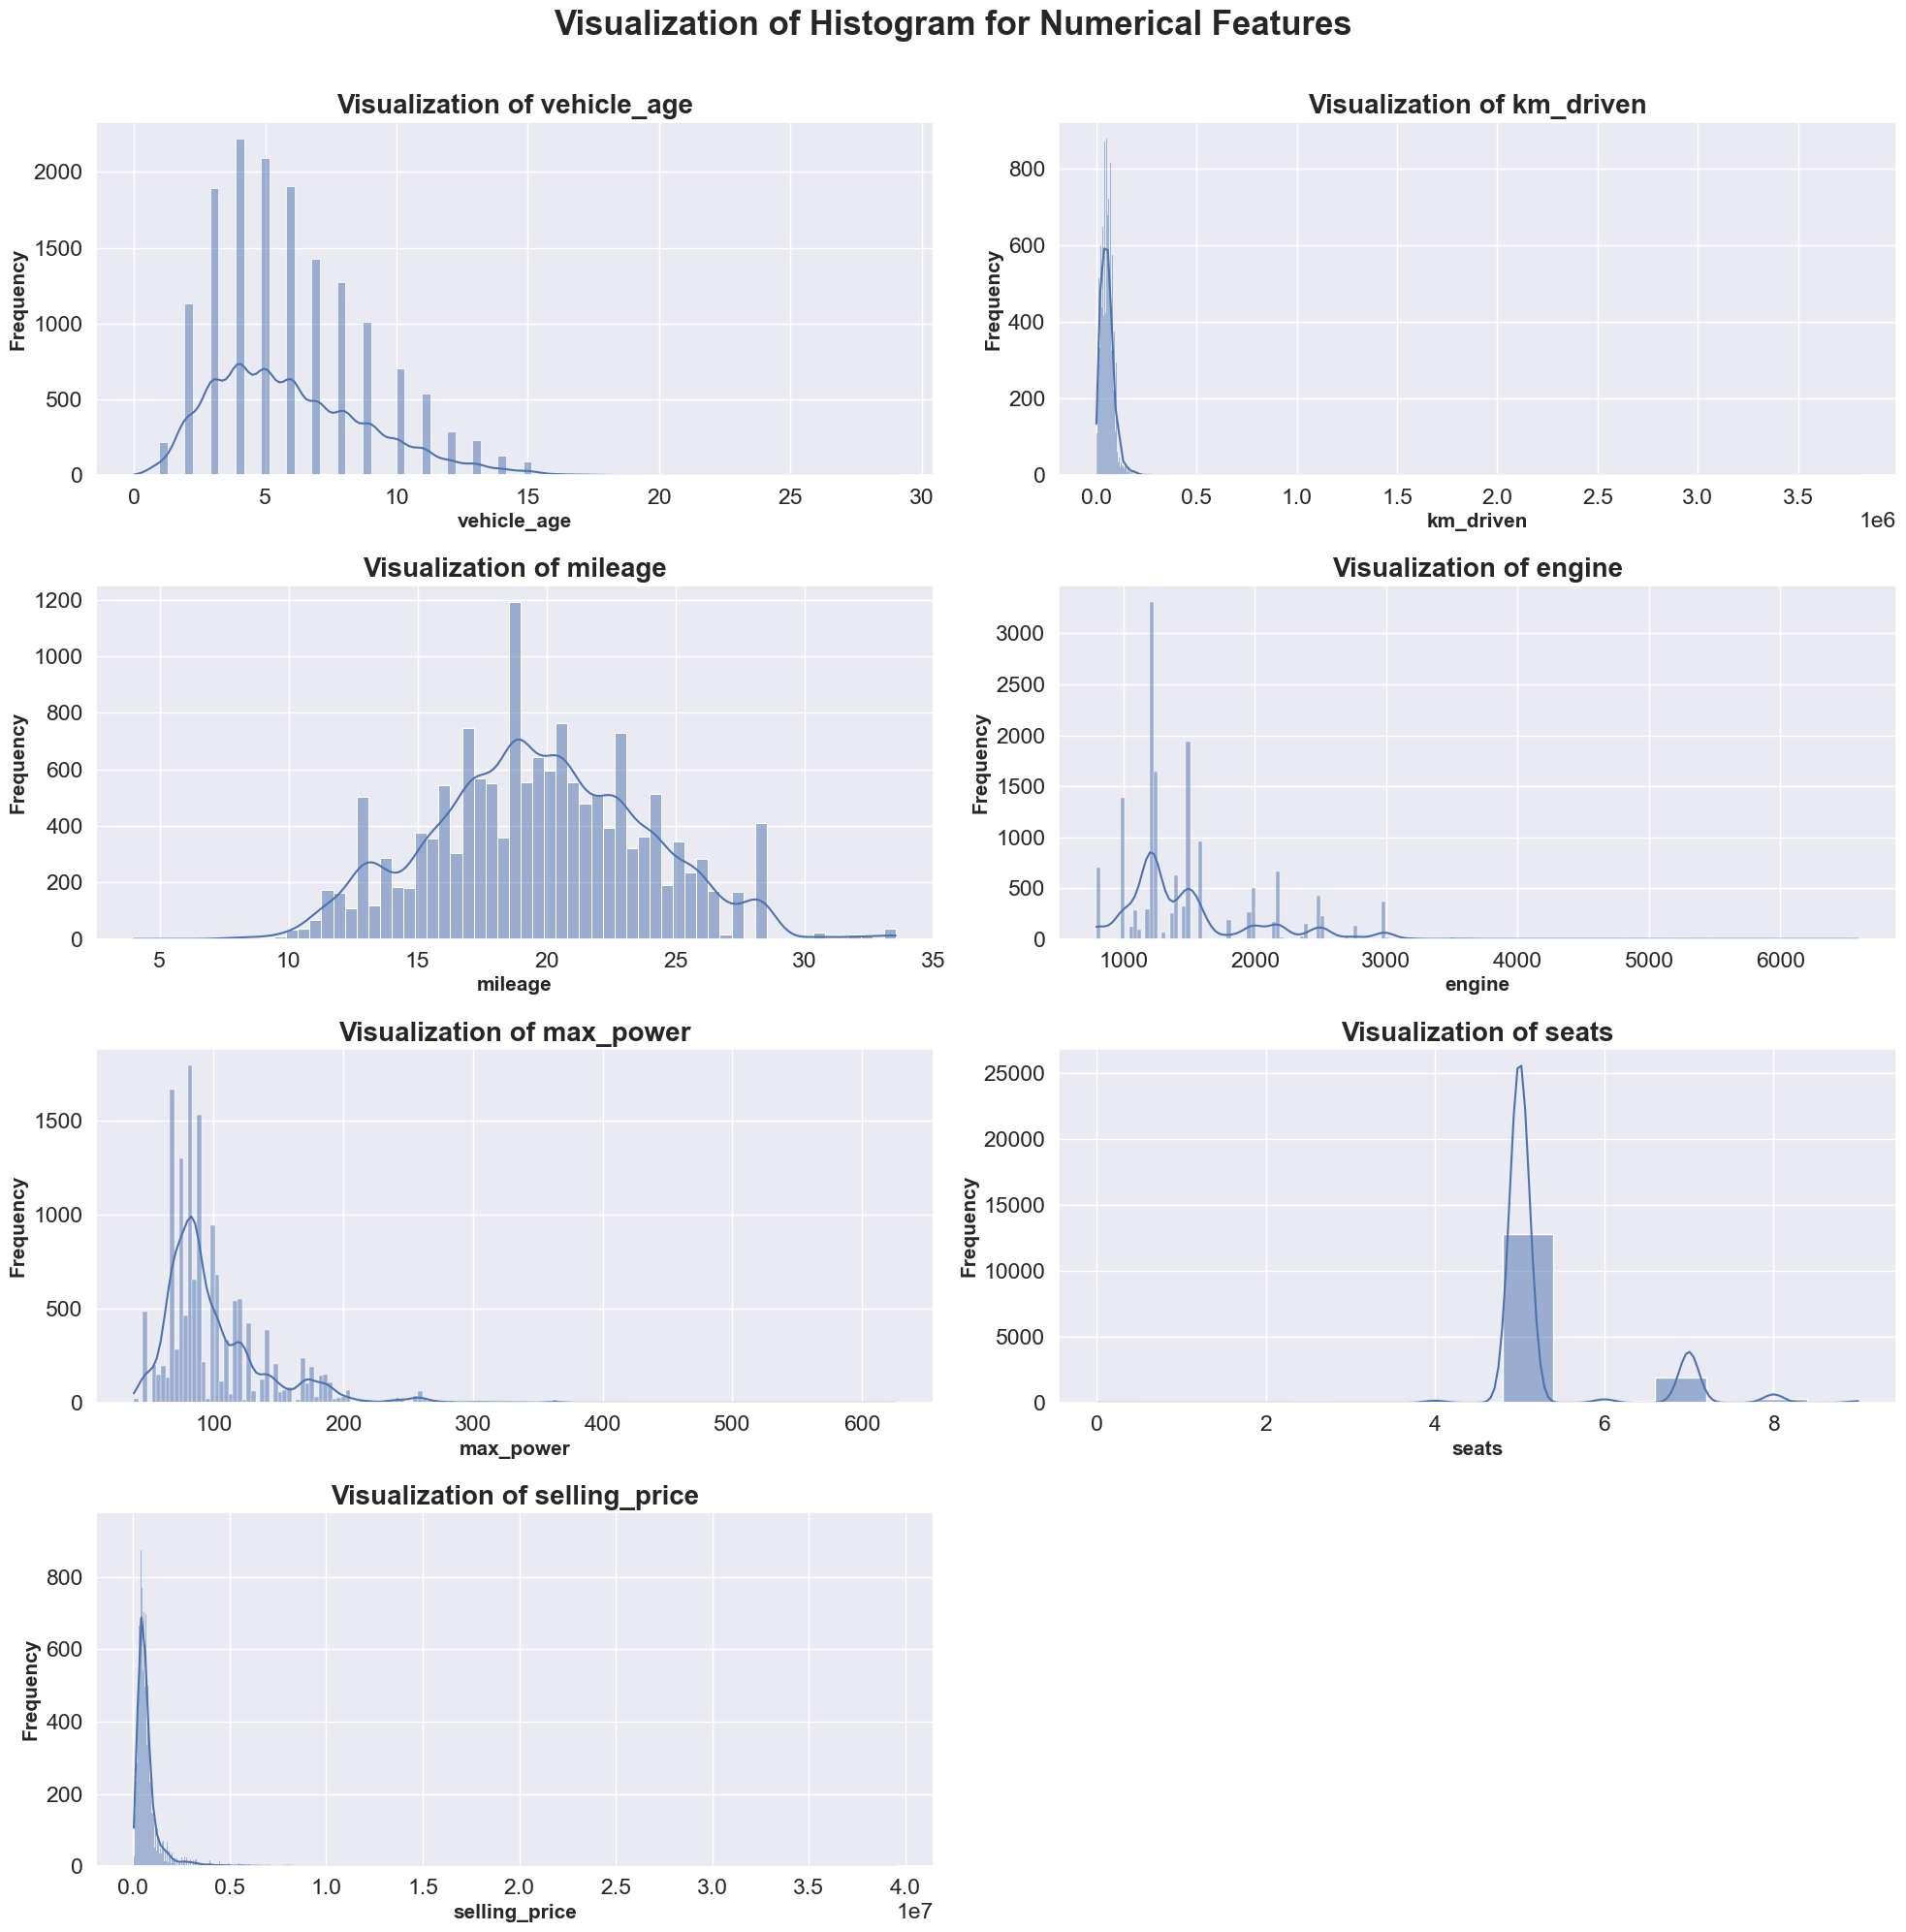

In [43]:
# Let's visualize numerical features' distribution using histogram.

plt.figure(figsize = (20,20))
plt.suptitle('Visualization of Histogram for Numerical Features', fontsize = 25, fontweight = 'bold', alpha = 1, y = 1)
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)

for idx, col in enumerate(numerical_features):
    plt.subplot(4,2,idx+1)
    sns.histplot(x = col, data = car_df_copy, kde = True)
    plt.title(f'Visualization of {col}', fontsize = 20, fontweight = 'bold')
    plt.xlabel(col, fontsize = 15, fontweight = 'bold')
    plt.ylabel('Frequency', fontsize = 15, fontweight = 'bold')
plt.tight_layout()
plt.show()

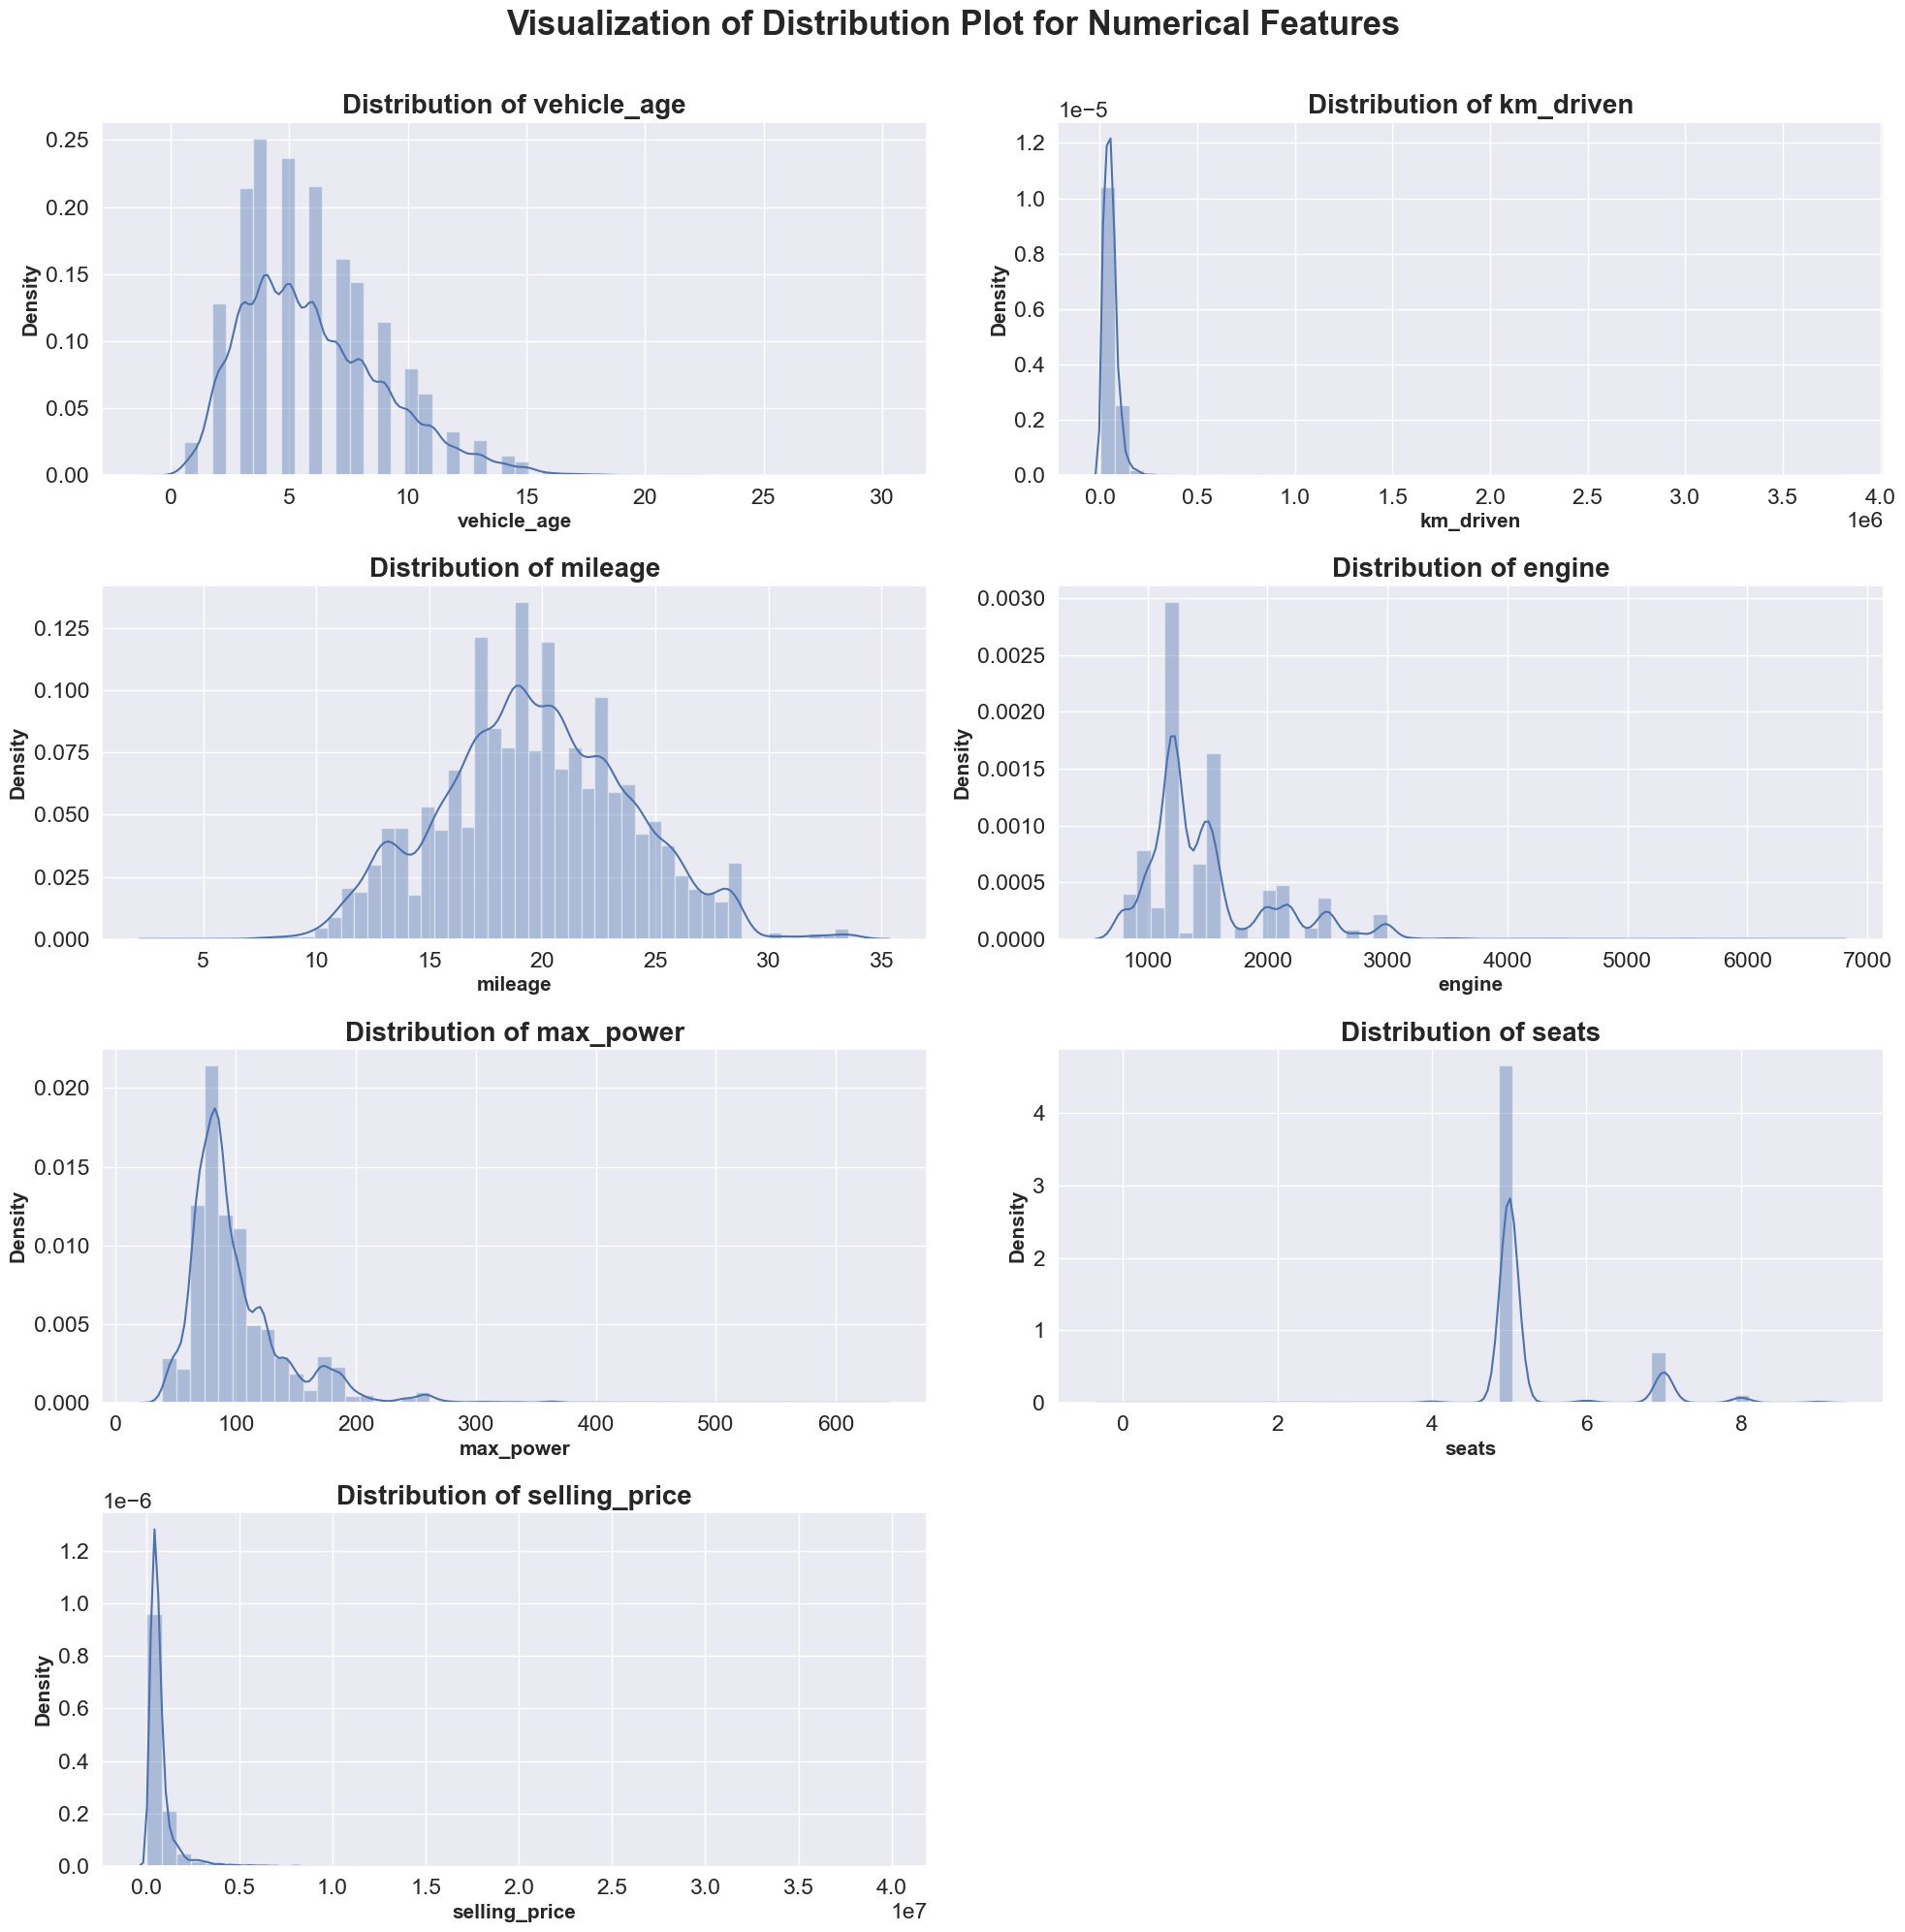

In [44]:
# Let's visualize numerical features' distribution using distplot.

plt.figure(figsize = (20,20))
plt.suptitle('Visualization of Distribution Plot for Numerical Features', fontsize = 25, fontweight = 'bold', alpha = 1, y = 1)
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)

for idx,col in enumerate(numerical_features):
    plt.subplot(4,2,idx+1)
    sns.distplot(a = car_df_copy[col])
    plt.title(f'Distribution of {col}', fontsize = 20, fontweight = 'bold', y = 1)
    plt.xlabel(col, fontsize = 15, fontweight = 'bold')
    plt.ylabel('Density', fontsize = 15, fontweight = 'bold')
plt.tight_layout()
plt.show()

## Observations:

1. Both histplot and distplot will yield the same result  (in terms of distribution). However, y-axis of histplot will hold the frequency or count of datapoints whereas y-axis of distplot will hold the probability density for the datapoints.


In [45]:
# To determine the skewness of all numerical features.

for col in numerical_features:
    print(f'{col} = {car_df_copy[col].skew()}')

vehicle_age = 0.8335216253296358
km_driven = 28.22898717250609
mileage = 0.11001311965810186
engine = 1.6693723342765432
max_power = 2.486646531594667
seats = 2.037977379513656
selling_price = 10.10889556800239


## Insights:

1. All the numerical features are right skewed (>0).
2. Out of all numerical features, km_driven has the most extreme values towards the right which denotes that there are high possibilities of outliers.
3. Let's try to apply transformation techniques (sqrt/cu.root /log) for km_driven to reduce the skewness. 

In [46]:
# Applying log transformation technique for km_driven.

car_df_copy_trf = car_df_copy.copy()

car_df_copy_trf['km_driven'] = np.log(car_df_copy['km_driven'])

In [47]:
car_df_copy_trf.head()

model  vehicle_age  km_driven seller_type fuel_type transmission_type  \
0      Alto            9  11.695247  Individual    Petrol            Manual   
1     Grand            5   9.903488  Individual    Petrol            Manual   
2       i20           11  11.002100  Individual    Petrol            Manual   
3      Alto            9  10.518673  Individual    Petrol            Manual   
4  Ecosport            6  10.308953      Dealer    Diesel            Manual   

   mileage  engine  max_power  seats  selling_price  
0    19.70     796      46.30      5         120000  
1    18.90    1197      82.00      5         550000  
2    17.00    1197      80.00      5         215000  
3    20.92     998      67.10      5         226000  
4    22.77    1498      98.59      5         570000

In [48]:
# Let's check the skewness for km_driven_log & selling_price_log.
print('Skewness of km_driven_log = ',car_df_copy_trf['km_driven'].skew())

Skewness of km_driven_log =  -1.037434618559201


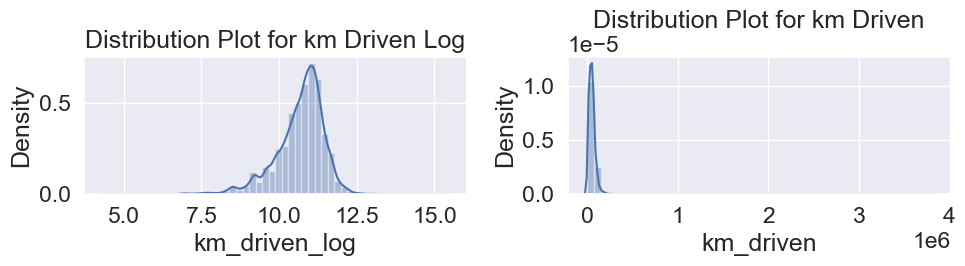

In [49]:
# Compare km_driven feature before & after transformation using distplot.
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
plt.title('Distribution Plot for km Driven Log')
sns.distplot(a = car_df_copy_trf['km_driven'])
plt.xlabel('km_driven_log')
plt.ylabel('Density')
plt.subplot(1,2,2)
plt.title('Distribution Plot for km Driven')
sns.distplot(a = car_df_copy['km_driven'])
plt.xlabel('km_driven')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

## Insights:

The skewness of km_driven feature has been reduced after applying log transformation technique. This eventually removes the possiblities of outliers as well.

In [50]:
car_df_copy.head()

model  vehicle_age  km_driven seller_type fuel_type transmission_type  \
0      Alto            9     120000  Individual    Petrol            Manual   
1     Grand            5      20000  Individual    Petrol            Manual   
2       i20           11      60000  Individual    Petrol            Manual   
3      Alto            9      37000  Individual    Petrol            Manual   
4  Ecosport            6      30000      Dealer    Diesel            Manual   

   mileage  engine  max_power  seats  selling_price  
0    19.70     796      46.30      5         120000  
1    18.90    1197      82.00      5         550000  
2    17.00    1197      80.00      5         215000  
3    20.92     998      67.10      5         226000  
4    22.77    1498      98.59      5         570000

In [51]:
# Fetch the minimum, average & maximum selling price based on seller_type.

# SELECT MIN(SELLING_PRICE), AVG(SELLING_PRICE), MAX(SELLING_PRICE),COUNT(SELLING_PRICE), SELLER_TYPE
# FROM CAR_DF_COPY
# GROUPBY SELLER_TYPE

car_df_copy.groupby('seller_type')['selling_price'].agg(['min','mean','median','max','count']).reset_index().sort_values(ascending=False, by = 'max')

seller_type     min           mean    median       max  count
0            Dealer   55000  870400.888043  590000.0  39500000   9459
1        Individual   40000  619650.369743  510000.0  24200000   5612
2  Trustmark Dealer  210000  571959.537572  540000.0   1575000    173

## Insights:

As expected, dealer does the most no. of car resales when compared to individual & trustmark dealer.

In [52]:
# Fetch the seller who has sold atleast 200 cars along with their aggregate selling prices.

# SELECT MIN(SELLING_PRICE), AVG(SELLING_PRICE), MAX(SELLING_PRICE),COUNT(SELLING_PRICE), SELLER_TYPE
# FROM CAR_DF_COPY
# GROUPBY SELLER_TYPE
# HAVING COUNT(SELLING_PRICE) >= 200

result = car_df_copy.groupby('seller_type')['selling_price'].agg(['min','mean','median','max','count']).reset_index().sort_values(ascending=False,by='max')
result[result['count'] >= 200]

seller_type    min           mean    median       max  count
0      Dealer  55000  870400.888043  590000.0  39500000   9459
1  Individual  40000  619650.369743  510000.0  24200000   5612

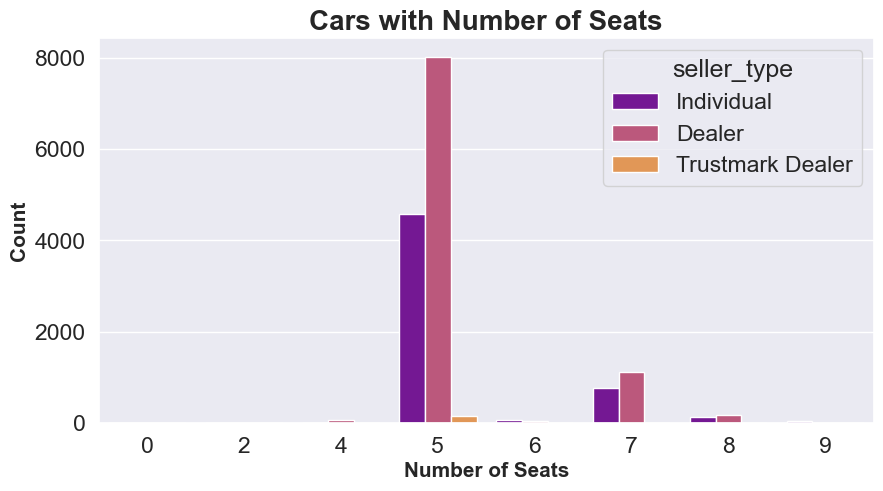

In [53]:
# Which seat capacity are the most resold.

plt.figure(figsize = (10,5))
plt.title('Cars with Number of Seats', fontsize = 20, fontweight = 'bold')
sns.countplot(x = 'seats', data = car_df_copy, palette = 'plasma', hue = 'seller_type')
plt.xlabel('Number of Seats', fontsize = 15, fontweight = 'bold')
plt.ylabel('Count', fontsize = 15, fontweight = 'bold')
plt.show()

## Insights:

Cars with 5 seaters are the most sold and that too the most by the dealers.

In [54]:
# let's visualize the presence of outliers for numerical features.

numerical_features
for col in numerical_features:
    if col != 'selling_price':
        fig = px.box(x = col, data_frame = car_df_copy)
        fig.show()

In [55]:
car_df_copy_trf.head()

model  vehicle_age  km_driven seller_type fuel_type transmission_type  \
0      Alto            9  11.695247  Individual    Petrol            Manual   
1     Grand            5   9.903488  Individual    Petrol            Manual   
2       i20           11  11.002100  Individual    Petrol            Manual   
3      Alto            9  10.518673  Individual    Petrol            Manual   
4  Ecosport            6  10.308953      Dealer    Diesel            Manual   

   mileage  engine  max_power  seats  selling_price  
0    19.70     796      46.30      5         120000  
1    18.90    1197      82.00      5         550000  
2    17.00    1197      80.00      5         215000  
3    20.92     998      67.10      5         226000  
4    22.77    1498      98.59      5         570000

<Axes: >

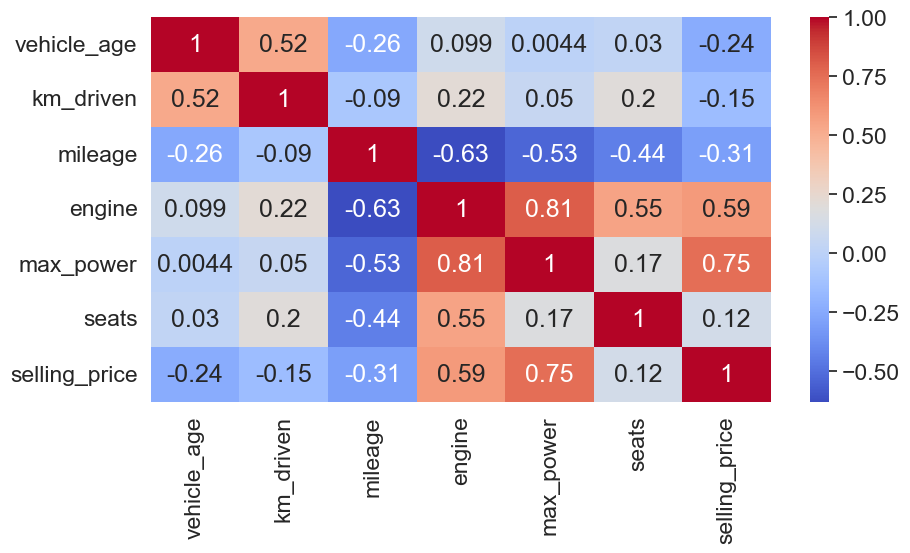

In [56]:
# Let's visualize the correlation between input and output features.

plt.figure(figsize = (10,5))
sns.heatmap(car_df_copy_trf.corr(), annot = True, cmap = 'coolwarm')

## Insights:

1. Higher the engine (which in turn increases the max_power), higher will be selling_price for the cars. 
2. Contrastingly, when the vehicle is too old (higher vehicle_age), the selling_price will get reduced. Similarly, higher the mileage, lower the selling_price.

<Figure size 1000x500 with 0 Axes>

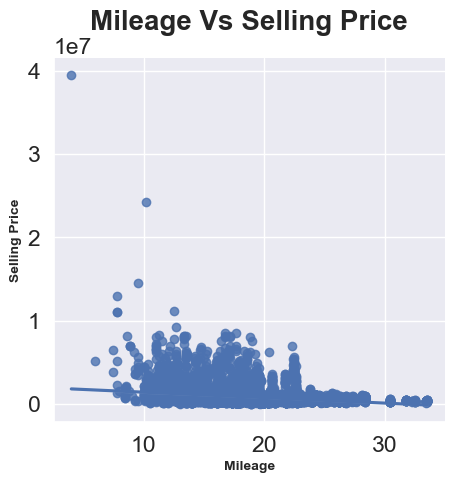

In [57]:
# lmplot between mileage & selling price.

plt.figure(figsize = (10,5))
sns.lmplot(x = 'mileage', y = 'selling_price', data = car_df_copy_trf, palette = 'plasma')
plt.xlabel('Mileage', fontsize = 10, fontweight  = 'bold')
plt.ylabel('Selling Price', fontsize = 10, fontweight = 'bold')
plt.title('Mileage Vs Selling Price', fontsize = 20, fontweight = 'bold')
plt.show()

<Figure size 1000x500 with 0 Axes>

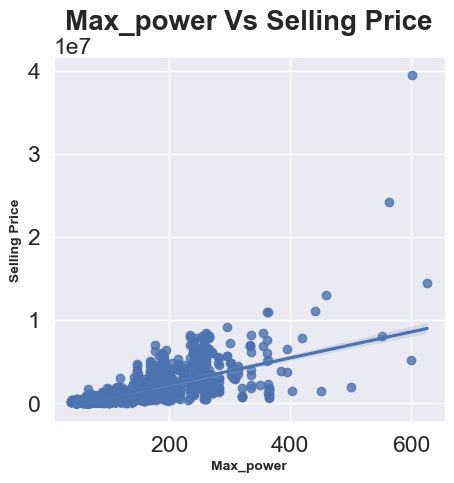

In [58]:
# lmplot between max_power & selling price.

plt.figure(figsize = (10,5))
sns.lmplot(x = 'max_power', y = 'selling_price', data = car_df_copy_trf, palette = 'plasma')
plt.xlabel('Max_power', fontsize = 10, fontweight  = 'bold')
plt.ylabel('Selling Price', fontsize = 10, fontweight = 'bold')
plt.title('Max_power Vs Selling Price', fontsize = 20, fontweight = 'bold')
plt.show()

## Train Test Split

In [59]:
car_df_copy_trf.head()

model  vehicle_age  km_driven seller_type fuel_type transmission_type  \
0      Alto            9  11.695247  Individual    Petrol            Manual   
1     Grand            5   9.903488  Individual    Petrol            Manual   
2       i20           11  11.002100  Individual    Petrol            Manual   
3      Alto            9  10.518673  Individual    Petrol            Manual   
4  Ecosport            6  10.308953      Dealer    Diesel            Manual   

   mileage  engine  max_power  seats  selling_price  
0    19.70     796      46.30      5         120000  
1    18.90    1197      82.00      5         550000  
2    17.00    1197      80.00      5         215000  
3    20.92     998      67.10      5         226000  
4    22.77    1498      98.59      5         570000

In [60]:
X = car_df_copy_trf.iloc[:,:-1]
y = car_df_copy_trf.iloc[:,-1]

In [61]:
X.head()

model  vehicle_age  km_driven seller_type fuel_type transmission_type  \
0      Alto            9  11.695247  Individual    Petrol            Manual   
1     Grand            5   9.903488  Individual    Petrol            Manual   
2       i20           11  11.002100  Individual    Petrol            Manual   
3      Alto            9  10.518673  Individual    Petrol            Manual   
4  Ecosport            6  10.308953      Dealer    Diesel            Manual   

   mileage  engine  max_power  seats  
0    19.70     796      46.30      5  
1    18.90    1197      82.00      5  
2    17.00    1197      80.00      5  
3    20.92     998      67.10      5  
4    22.77    1498      98.59      5

In [62]:
y.head()

0    120000
1    550000
2    215000
3    226000
4    570000
Name: selling_price, dtype: int64

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [64]:
print(f'Shape of X-train : {X_train.shape}')
print(f'Shape of y-train : {y_train.shape}')
print(f'Shape of X-test  : {X_test.shape}')
print(f'Shape of y-test  : {y_test.shape}')

Shape of X-train : (12195, 10)
Shape of y-train : (12195,)
Shape of X-test  : (3049, 10)
Shape of y-test  : (3049,)


In [65]:
# Let's apply target encoder for model feature as there is high cardinality.

target_enc = TargetEncoder(cols = ['model'])
target_enc.fit(X_train,y_train)

TargetEncoder(cols=['model'])

In [66]:
X_train = target_enc.transform(X_train)
X_test  = target_enc.transform(X_test)

In [67]:
X_train.head()

model  vehicle_age  km_driven seller_type fuel_type  \
3795   720167.300382            5  10.644806      Dealer    Diesel   
4829   305403.289474           16  11.407565  Individual    Petrol   
1520   515765.970528           10  11.289782  Individual    Diesel   
13571  960561.351624            8  10.925435      Dealer    Petrol   
4540   343531.746068            4  11.608236  Individual    Petrol   

      transmission_type  mileage  engine  max_power  seats  
3795             Manual    24.52    1248      88.50      7  
4829             Manual    14.00    1061      64.00      5  
1520             Manual    20.54    1598     103.60      5  
13571         Automatic    13.70    1798     157.75      5  
4540             Manual    23.01     999      67.00      5

In [68]:
X_test.head()

model  vehicle_age  km_driven seller_type fuel_type  \
4093   5.458727e+05            4  10.819778  Individual    Petrol   
10766  6.260373e+05           10  11.082143      Dealer    Petrol   
10375  8.340491e+05            5  11.050890  Individual    Diesel   
3774   2.577959e+06            4   9.957928      Dealer    Diesel   
8779   5.157660e+05            5  10.289838      Dealer    Diesel   

      transmission_type  mileage  engine  max_power  seats  
4093             Manual    17.19    1197      81.86      5  
10766            Manual    17.00    1497     118.00      5  
10375            Manual    24.30    1248      88.50      5  
3774          Automatic    16.46    2993     258.00      5  
8779             Manual    22.27    1498     108.60      5

In [69]:
# Let's perform one hot encoding on categorical features.

cols_to_one_hot_enc = ['seller_type','fuel_type','transmission_type']

oh_enc = OneHotEncoder(drop = 'first', dtype='int',handle_unknown='ignore')
oh_enc.fit(X_train[cols_to_one_hot_enc])

OneHotEncoder(drop='first', dtype='int', handle_unknown='ignore')

In [70]:
X_train_encoded_array = oh_enc.transform(X_train[cols_to_one_hot_enc]).toarray()
X_test_encoded_array  = oh_enc.transform(X_test[cols_to_one_hot_enc]).toarray()

In [71]:
X_train_encoded_array

array([[0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [72]:
X_test_encoded_array

array([[1, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 0]])

In [73]:
X_train_encoded = pd.DataFrame(X_train_encoded_array,columns = oh_enc.get_feature_names_out(cols_to_one_hot_enc),index = X_train.index)
X_test_encoded  = pd.DataFrame(X_test_encoded_array,columns = oh_enc.get_feature_names_out(cols_to_one_hot_enc),index = X_test.index)

In [74]:
X_train_encoded.head()

seller_type_Individual  seller_type_Trustmark Dealer  fuel_type_Diesel  \
3795                        0                             0                 1   
4829                        1                             0                 0   
1520                        1                             0                 1   
13571                       0                             0                 0   
4540                        1                             0                 0   

       fuel_type_Electric  fuel_type_LPG  fuel_type_Petrol  \
3795                    0              0                 0   
4829                    0              0                 1   
1520                    0              0                 0   
13571                   0              0                 1   
4540                    0              0                 1   

       transmission_type_Manual  
3795                          1  
4829                          1  
1520                          1  
13571                         0  
4540                          1

In [75]:
X_test_encoded.head()

seller_type_Individual  seller_type_Trustmark Dealer  fuel_type_Diesel  \
4093                        1                             0                 0   
10766                       0                             0                 0   
10375                       1                             0                 1   
3774                        0                             0                 1   
8779                        0                             0                 1   

       fuel_type_Electric  fuel_type_LPG  fuel_type_Petrol  \
4093                    0              0                 1   
10766                   0              0                 1   
10375                   0              0                 0   
3774                    0              0                 0   
8779                    0              0                 0   

       transmission_type_Manual  
4093                          1  
10766                         1  
10375                         1  
3774                          0  
8779                          1

In [76]:
# Let's concatenate encoded data with actual data.

X_train = pd.concat([X_train,X_train_encoded],axis = 1)
X_test  = pd.concat([X_test,X_test_encoded],axis = 1)

In [77]:
X_train.head()

model  vehicle_age  km_driven seller_type fuel_type  \
3795   720167.300382            5  10.644806      Dealer    Diesel   
4829   305403.289474           16  11.407565  Individual    Petrol   
1520   515765.970528           10  11.289782  Individual    Diesel   
13571  960561.351624            8  10.925435      Dealer    Petrol   
4540   343531.746068            4  11.608236  Individual    Petrol   

      transmission_type  mileage  engine  max_power  seats  \
3795             Manual    24.52    1248      88.50      7   
4829             Manual    14.00    1061      64.00      5   
1520             Manual    20.54    1598     103.60      5   
13571         Automatic    13.70    1798     157.75      5   
4540             Manual    23.01     999      67.00      5   

       seller_type_Individual  seller_type_Trustmark Dealer  fuel_type_Diesel  \
3795                        0                             0                 1   
4829                        1                             0                 0   
1520                        1                             0                 1   
13571                       0                             0                 0   
4540                        1                             0                 0   

       fuel_type_Electric  fuel_type_LPG  fuel_type_Petrol  \
3795                    0              0                 0   
4829                    0              0                 1   
1520                    0              0                 0   
13571                   0              0                 1   
4540                    0              0                 1   

       transmission_type_Manual  
3795                          1  
4829                          1  
1520                          1  
13571                         0  
4540                          1

In [78]:
X_test.head()

model  vehicle_age  km_driven seller_type fuel_type  \
4093   5.458727e+05            4  10.819778  Individual    Petrol   
10766  6.260373e+05           10  11.082143      Dealer    Petrol   
10375  8.340491e+05            5  11.050890  Individual    Diesel   
3774   2.577959e+06            4   9.957928      Dealer    Diesel   
8779   5.157660e+05            5  10.289838      Dealer    Diesel   

      transmission_type  mileage  engine  max_power  seats  \
4093             Manual    17.19    1197      81.86      5   
10766            Manual    17.00    1497     118.00      5   
10375            Manual    24.30    1248      88.50      5   
3774          Automatic    16.46    2993     258.00      5   
8779             Manual    22.27    1498     108.60      5   

       seller_type_Individual  seller_type_Trustmark Dealer  fuel_type_Diesel  \
4093                        1                             0                 0   
10766                       0                             0                 0   
10375                       1                             0                 1   
3774                        0                             0                 1   
8779                        0                             0                 1   

       fuel_type_Electric  fuel_type_LPG  fuel_type_Petrol  \
4093                    0              0                 1   
10766                   0              0                 1   
10375                   0              0                 0   
3774                    0              0                 0   
8779                    0              0                 0   

       transmission_type_Manual  
4093                          1  
10766                         1  
10375                         1  
3774                          0  
8779                          1

In [79]:
# Let's drop the categorical features.
X_train = X_train.drop(columns = cols_to_one_hot_enc, axis = 1)
X_test  = X_test.drop(columns = cols_to_one_hot_enc, axis = 1)

In [80]:
X_train.head()

model  vehicle_age  km_driven  mileage  engine  max_power  \
3795   720167.300382            5  10.644806    24.52    1248      88.50   
4829   305403.289474           16  11.407565    14.00    1061      64.00   
1520   515765.970528           10  11.289782    20.54    1598     103.60   
13571  960561.351624            8  10.925435    13.70    1798     157.75   
4540   343531.746068            4  11.608236    23.01     999      67.00   

       seats  seller_type_Individual  seller_type_Trustmark Dealer  \
3795       7                       0                             0   
4829       5                       1                             0   
1520       5                       1                             0   
13571      5                       0                             0   
4540       5                       1                             0   

       fuel_type_Diesel  fuel_type_Electric  fuel_type_LPG  fuel_type_Petrol  \
3795                  1                   0              0                 0   
4829                  0                   0              0                 1   
1520                  1                   0              0                 0   
13571                 0                   0              0                 1   
4540                  0                   0              0                 1   

       transmission_type_Manual  
3795                          1  
4829                          1  
1520                          1  
13571                         0  
4540                          1

In [81]:
X_test.head()

model  vehicle_age  km_driven  mileage  engine  max_power  \
4093   5.458727e+05            4  10.819778    17.19    1197      81.86   
10766  6.260373e+05           10  11.082143    17.00    1497     118.00   
10375  8.340491e+05            5  11.050890    24.30    1248      88.50   
3774   2.577959e+06            4   9.957928    16.46    2993     258.00   
8779   5.157660e+05            5  10.289838    22.27    1498     108.60   

       seats  seller_type_Individual  seller_type_Trustmark Dealer  \
4093       5                       1                             0   
10766      5                       0                             0   
10375      5                       1                             0   
3774       5                       0                             0   
8779       5                       0                             0   

       fuel_type_Diesel  fuel_type_Electric  fuel_type_LPG  fuel_type_Petrol  \
4093                  0                   0              0                 1   
10766                 0                   0              0                 1   
10375                 1                   0              0                 0   
3774                  1                   0              0                 0   
8779                  1                   0              0                 0   

       transmission_type_Manual  
4093                          1  
10766                         1  
10375                         1  
3774                          0  
8779                          1

In [82]:
# Let's apply Standardization for numerical features.

# cols_to_standardize = ['vehicle_age','km_driven','mileage','engine','max_power','seats']

std_scaler = StandardScaler()
std_scaler.fit(X_train)

StandardScaler()

In [83]:
X_train_ss = std_scaler.transform(X_train)
X_test_ss  = std_scaler.transform(X_test)

In [84]:
X_train_ss

array([[-0.00399511, -0.34765026, -0.03567688, ..., -0.05287554,
        -1.00435553,  0.51252686],
       [-0.80892988,  3.28553329,  0.94763679, ..., -0.05287554,
         0.99566336,  0.51252686],
       [-0.40067788,  1.30379681,  0.7957964 , ..., -0.05287554,
        -1.00435553,  0.51252686],
       ...,
       [ 0.89990738, -0.34765026,  0.88902882, ..., -0.05287554,
        -1.00435553,  0.51252686],
       [-0.85418252, -1.3385185 , -1.88492257, ..., -0.05287554,
         0.99566336,  0.51252686],
       [-0.93091273,  0.64321798, -0.14370549, ..., -0.05287554,
         0.99566336,  0.51252686]])

In [85]:
X_test_ss

array([[-0.34224953, -0.67793967,  0.18988966, ..., -0.05287554,
         0.99566336,  0.51252686],
       [-0.18667374,  1.30379681,  0.52811742, ..., -0.05287554,
         0.99566336,  0.51252686],
       [ 0.21701593, -0.34765026,  0.4878281 , ..., -0.05287554,
        -1.00435553,  0.51252686],
       ...,
       [ 0.56669059, -1.00822909, -0.08724864, ..., -0.05287554,
        -1.00435553,  0.51252686],
       [-0.13133203,  1.96437564,  0.31275909, ..., -0.05287554,
         0.99566336,  0.51252686],
       [ 4.24402137, -0.34765026, -0.60446875, ..., -0.05287554,
        -1.00435553, -1.95111724]])

In [86]:
# X_train_ss = pd.DataFrame(X_train_ss,columns = std_scaler.get_feature_names_out(cols_to_standardize),index = X_train.index)
# X_test_ss  = pd.DataFrame(X_test_ss,columns = std_scaler.get_feature_names_out(cols_to_standardize), index=X_test.index)

In [87]:
# X_train_ss.head()

In [88]:
# X_test_ss.head()

In [89]:
# Let's drop numerical features which are already standardized.

# X_train = X_train.drop(columns = cols_to_standardize, axis = 1)
# X_test  = X_test.drop(columns  = cols_to_standardize, axis = 1)

In [90]:
# X_train.head()

In [91]:
# X_test.head()

In [92]:
# Let's concat X_train & X_train_ss, X_test & X_test_ss.

# X_train = pd.concat([X_train,X_train_ss],axis = 1)
# X_test  = pd.concat([X_test,X_test_ss], axis = 1)

In [93]:
# X_train.head()

In [94]:
# X_test.head()

In [95]:
# Convert the dataframe to arrays for model training.

# X_train = X_train.to_numpy()
# X_test  = X_test.to_numpy()

X_train = X_train_ss.copy()
X_test = X_test_ss.copy()

In [96]:
X_train

array([[-0.00399511, -0.34765026, -0.03567688, ..., -0.05287554,
        -1.00435553,  0.51252686],
       [-0.80892988,  3.28553329,  0.94763679, ..., -0.05287554,
         0.99566336,  0.51252686],
       [-0.40067788,  1.30379681,  0.7957964 , ..., -0.05287554,
        -1.00435553,  0.51252686],
       ...,
       [ 0.89990738, -0.34765026,  0.88902882, ..., -0.05287554,
        -1.00435553,  0.51252686],
       [-0.85418252, -1.3385185 , -1.88492257, ..., -0.05287554,
         0.99566336,  0.51252686],
       [-0.93091273,  0.64321798, -0.14370549, ..., -0.05287554,
         0.99566336,  0.51252686]])

In [97]:
X_test

array([[-0.34224953, -0.67793967,  0.18988966, ..., -0.05287554,
         0.99566336,  0.51252686],
       [-0.18667374,  1.30379681,  0.52811742, ..., -0.05287554,
         0.99566336,  0.51252686],
       [ 0.21701593, -0.34765026,  0.4878281 , ..., -0.05287554,
        -1.00435553,  0.51252686],
       ...,
       [ 0.56669059, -1.00822909, -0.08724864, ..., -0.05287554,
        -1.00435553,  0.51252686],
       [-0.13133203,  1.96437564,  0.31275909, ..., -0.05287554,
         0.99566336,  0.51252686],
       [ 4.24402137, -0.34765026, -0.60446875, ..., -0.05287554,
        -1.00435553, -1.95111724]])

## Perform Model Training.

In [98]:
# Dummy Regressor.

dummy_reg = DummyRegressor()
dummy_reg.fit(X_train,y_train)

DummyRegressor()

In [99]:
dummy_pred = dummy_reg.predict(X_test)

In [100]:
# Compare Actual & Predicted Prices.

dummy_compare_df = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values' : dummy_pred
})

dummy_compare_df.head()

Actual Values  Predicted Values
4093          680000     774463.458385
10766         350000     774463.458385
10375         675000     774463.458385
3774         7500000     774463.458385
8779          449000     774463.458385

In [101]:
# To evaluate the model performance.

dummy_score_train = dummy_reg.score(X_train,y_train)
dummy_score_test  = dummy_reg.score(X_test,y_test)

print(f'Score of Training Data : {dummy_score_train}')
print(f'Score of Testing Data  : {dummy_score_test}')

dummy_r2_score_train = r2_score(y_train,dummy_reg.predict(X_train))
dummy_r2_score_test  = r2_score(y_test,dummy_reg.predict(X_test))

print(f'R2 Score of Training Data : {dummy_r2_score_train}')
print(f'R2 Score of Testing Data  : {dummy_r2_score_test}')

dummy_adj_r2_score_train = 1 - (((1 - dummy_r2_score_train) * (len(y_train) - 1))/(len(y_train) - X_train.shape[1] - 1))
dummy_adj_r2_score_test  = 1 - (((1 - dummy_r2_score_test) * (len(y_test) - 1))/(len(y_test) - X_test.shape[1] - 1))

print(f'Adj R2 Score of Training Data : {dummy_adj_r2_score_train}')
print(f'Adj R2 Score of Testing Data : {dummy_adj_r2_score_test}')

dummy_mean_squared_err = mean_squared_error(y_test, dummy_reg.predict(X_test))
print(f'Mean Squared Error : {dummy_mean_squared_err}')

dummy_rmse = np.sqrt(dummy_mean_squared_err)
print(f'Root Mean Squared Error : {dummy_rmse}')

dummy_mae = mean_absolute_error(y_test,dummy_reg.predict(X_test))
print(f'Mean Absolute Error : {dummy_mae}')

Score of Training Data : 0.0
Score of Testing Data  : -2.3285254922011944e-06
R2 Score of Training Data : 0.0
R2 Score of Testing Data  : -2.3285254922011944e-06
Adj R2 Score of Training Data : -0.0011494252873562871
Adj R2 Score of Testing Data : -0.004616709738200386
Mean Squared Error : 608022239199.2389
Root Mean Squared Error : 779757.8080399317
Mean Absolute Error : 440053.64617560565


In [102]:
# Linear Regressor.

linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [103]:
linear_pred = linear_reg.predict(X_test)

In [104]:
# Compare Actual & Predicted Selling Prices.

lin_compare_df = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values' : linear_pred
})

lin_compare_df.head()

Actual Values  Predicted Values
4093          680000      5.153066e+05
10766         350000      6.395783e+05
10375         675000      7.484122e+05
3774         7500000      3.723313e+06
8779          449000      8.621598e+05

In [105]:
# To fetch the coefficients.

linear_reg.coef_

array([ 2.84308813e+05, -1.52532264e+05, -9.18404978e+04,  8.22079995e+04,
        4.63303435e+04,  4.67621812e+05,  7.73350673e+02, -6.75016287e+01,
       -1.25722953e+04, -7.57223087e+04,  2.07997215e+02,  1.85823258e+04,
       -4.31974086e+04, -8.83544104e+02])

## Insights:

1. For a unit increase in model, there will be Rs.284308.13 increase in selling price.
2. For a unit increase in vehicle_age, there will be Rs.152532.26 decrease in selling price.
3. For a unit increase in km_driven, there will be Rs.91840.49 decrease in selling price.
4. For a unit increase in mileage, there will be will be Rs.82207.99 decrease in selling price.
5. For a unit increase in engine, there will be Rs.46330.34 increase in selling price.
6. For a unit increase in max_power, there will be Rs.467621.8 increase in selling price.
7. For a unit increase in seats, there will be Rs.773.35 increase in selling price.
8. For a unit increase in seller_type_Individual, there will be Rs.67.5 decrease in selling price.
9. For a unit increase in seller_type_Trustmark Dealer, there will be Rs.12572.29 decrease in selling price.
10. For a unit increase in fuel_type_Diesel, there will be Rs.75722.31 decrease in selling price.
11. For a unit increase in fuel_type_Electric, there will be Rs.207.99 increase in selling price.
12. For a unit increase in fuel_type_LPG, there will be Rs.18582.33 increase in selling price.
13. For a unit increase in fuel_type_Petrol, there will be Rs.43197.41 decrease in selling price.
14. For a unit increase in transmission_type_Manual, there will be Rs.883.54 decrease in selling price.

In [106]:
# To fetch the intercept.

linear_reg.intercept_

774463.4583845839

In [107]:
# Evaluate model performance.

linear_score_train = linear_reg.score(X_train,y_train)
linear_score_test  = linear_reg.score(X_test,y_test)

print(f'Score of Training Data : {linear_score_train}')
print(f'Score of Testing Data  : {linear_score_test}')

linear_r2_score_train = r2_score(y_train,linear_reg.predict(X_train))
linear_r2_score_test  = r2_score(y_test,linear_reg.predict(X_test))

print(f'R2 Score of Training Data : {linear_r2_score_train}')
print(f'R2 Score of Testing Data  : {linear_r2_score_test}')

linear_adj_r2_score_train = 1 - (((1 - linear_r2_score_train) * (len(y_train) - 1))/(len(y_train) - X_train.shape[1] - 1))
linear_adj_r2_score_test  = 1 - (((1 - linear_r2_score_test) * (len(y_test) - 1))/(len(y_test) - X_test.shape[1] - 1))

print(f'Adj R2 Score of Training Data : {linear_adj_r2_score_train}')
print(f'Adj R2 Score of Testing Data : {linear_adj_r2_score_test}')

linear_mean_squared_err = mean_squared_error(y_test, linear_reg.predict(X_test))
print(f'Mean Squared Error : {linear_mean_squared_err}')

linear_rmse = np.sqrt(linear_mean_squared_err)
print(f'Root Mean Squared Error : {linear_rmse}')

linear_mae = mean_absolute_error(y_test,linear_reg.predict(X_test))
print(f'Mean Absolute Error : {linear_mae}')

Score of Training Data : 0.6489603818790586
Score of Testing Data  : 0.731119649469618
R2 Score of Training Data : 0.6489603818790586
R2 Score of Testing Data  : 0.731119649469618
Adj R2 Score of Training Data : 0.6485568880651265
Adj R2 Score of Testing Data : 0.7298789359206974
Mean Squared Error : 163484852127.51334
Root Mean Squared Error : 404332.600871502
Mean Absolute Error : 236179.8559583889


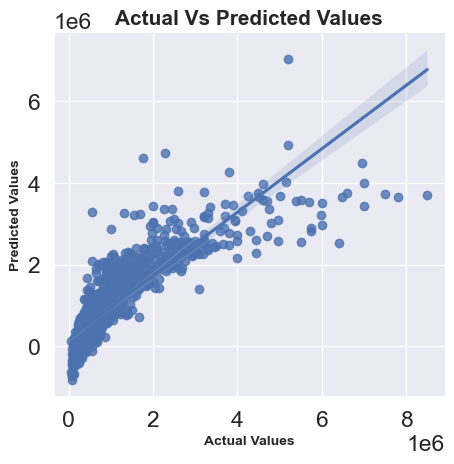

In [108]:
# Linearity check between actual & predicted values.

sns.lmplot(x = 'Actual Values', y = 'Predicted Values', data = lin_compare_df, palette = 'plasma')
plt.title('Actual Vs Predicted Values', fontsize = 15, fontweight  = 'bold')
plt.xlabel('Actual Values', fontsize = 10, fontweight = 'bold')
plt.ylabel('Predicted Values', fontsize = 10, fontweight = 'bold')
plt.show()

The actual & predicted values are in non-linear fashion which denotes that there is more difference between actual & predicted values.

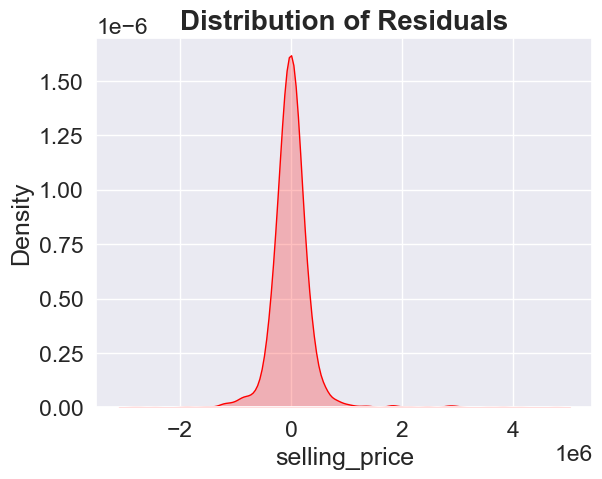

In [109]:
# Let's visualize the distribution of residuals using kde plot.

linear_residuals = y_test - linear_pred

plt.title('Distribution of Residuals', fontsize = 20, fontweight = 'bold')
sns.kdeplot(x = linear_residuals, fill = True, color = 'red')
plt.show()

The datapoints of resiudals are scattered around zero which denotes that some predicted values are not equal to true values.

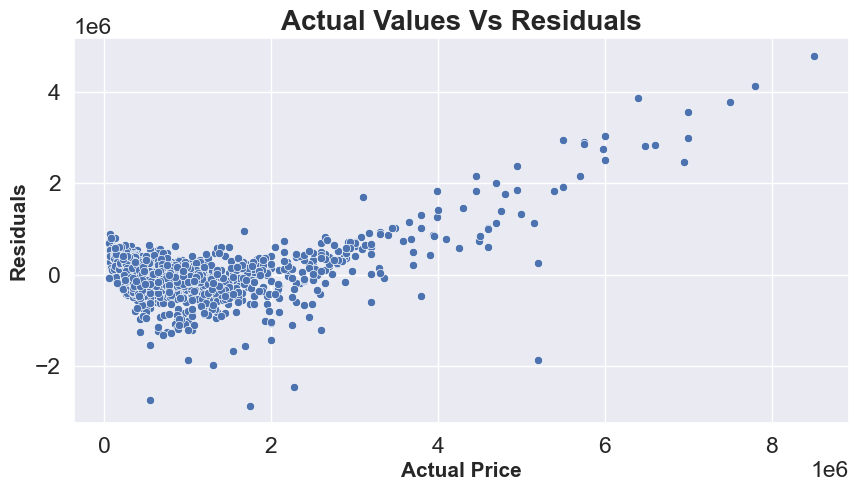

In [110]:
# To visualize the residuals through scatter plot.

plt.figure(figsize = (10,5))
plt.title('Actual Values Vs Residuals', fontsize = 20, fontweight = 'bold')
sns.scatterplot(x = y_test, y = linear_residuals, palette = 'plasma')
plt.xlabel('Actual Price', fontsize = 15, fontweight = 'bold')
plt.ylabel('Residuals', fontsize = 15, fontweight = 'bold')
plt.show()

## Insights:

1. When the datapoints are exactly at residual = 0 --> The predicted values and actual values are same.
2. When datapoints are at residual < 0 (over prediction) --> The actual values are less than the predicted values.
3. When datapoints are at residual > 0 (under prediction) --> The actual values are more than the predicted values.

In [111]:
# Lasso Regression.

lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

Lasso()

In [112]:
lasso_pred = lasso_reg.predict(X_test)

In [113]:
# Compare Actual & Predicted Values.

lasso_compare_df = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values' : lasso_pred
})

lasso_compare_df.head()

Actual Values  Predicted Values
4093          680000      5.153113e+05
10766         350000      6.395793e+05
10375         675000      7.484162e+05
3774         7500000      3.723304e+06
8779          449000      8.621612e+05

In [114]:
# Fetch the coefficients.
lasso_reg.coef_

array([ 2.84308665e+05, -1.52532364e+05, -9.18393615e+04,  8.22045104e+04,
        4.63269234e+04,  4.67620913e+05,  7.71633997e+02, -6.69328297e+01,
       -1.25708934e+04, -7.56955687e+04,  2.07730911e+02,  1.85835944e+04,
       -4.31734032e+04, -8.82891437e+02])

In [115]:
# Fetch the intercept.
lasso_reg.intercept_

774463.4583845839

In [116]:
# Evaluate the model performance.
lasso_score_train = lasso_reg.score(X_train,y_train)
lasso_score_test  = lasso_reg.score(X_test,y_test)

print(f'Score of Training Data : {lasso_score_train}')
print(f'Score of Testing Data  : {lasso_score_test}')

lasso_r2_score_train = r2_score(y_train,lasso_reg.predict(X_train))
lasso_r2_score_test  = r2_score(y_test,lasso_reg.predict(X_test))

print(f'R2 Score of Training Data : {lasso_r2_score_train}')
print(f'R2 Score of Testing Data  : {lasso_r2_score_test}')

lasso_adj_r2_score_train = 1 - (((1 - lasso_r2_score_train) * (len(y_train) - 1))/(len(y_train) - X_train.shape[1] - 1))
lasso_adj_r2_score_test  = 1 - (((1 - lasso_r2_score_test) * (len(y_test) - 1))/(len(y_test) - X_test.shape[1] - 1))

print(f'Adj R2 Score of Training Data : {lasso_adj_r2_score_train}')
print(f'Adj R2 Score of Testing Data : {lasso_adj_r2_score_test}')

lasso_mean_squared_err = mean_squared_error(y_test, lasso_reg.predict(X_test))
print(f'Mean Squared Error : {lasso_mean_squared_err}')

lasso_rmse = np.sqrt(lasso_mean_squared_err)
print(f'Root Mean Squared Error : {lasso_rmse}')

lasso_mae = mean_absolute_error(y_test,lasso_reg.predict(X_test))
print(f'Mean Absolute Error : {lasso_mae}')

Score of Training Data : 0.6489603818039695
Score of Testing Data  : 0.7311199900116543
R2 Score of Training Data : 0.6489603818039695
R2 Score of Testing Data  : 0.7311199900116543
Adj R2 Score of Training Data : 0.6485568879899511
Adj R2 Score of Testing Data : 0.7298792780341208
Mean Squared Error : 163484645070.86407
Root Mean Squared Error : 404332.3448239877
Mean Absolute Error : 236179.11174851857


In [117]:
# Ridge Regressor.

ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)

Ridge()

In [118]:
ridge_pred = ridge_reg.predict(X_test)

In [119]:
# Compare Actual & Predicted Values.
ridge_compare_df = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values' : ridge_pred
})
ridge_compare_df.head()

Actual Values  Predicted Values
4093          680000      5.153194e+05
10766         350000      6.395246e+05
10375         675000      7.483918e+05
3774         7500000      3.723195e+06
8779          449000      8.621324e+05

In [120]:
# Fetch the coefficients.
ridge_reg.coef_

array([ 2.84324098e+05, -1.52533170e+05, -9.18423723e+04,  8.21829056e+04,
        4.64584225e+04,  4.67437604e+05,  7.19467586e+02, -7.35093988e+01,
       -1.25700563e+04, -7.55887954e+04,  2.09867558e+02,  1.85909965e+04,
       -4.30726185e+04, -9.15765209e+02])

In [121]:
# Fetch the intercept.
ridge_reg.intercept_

774463.4583845839

In [122]:
# Evaluate the model performance.
ridge_score_train = ridge_reg.score(X_train,y_train)
ridge_score_test  = ridge_reg.score(X_test,y_test)

print(f'Score of Training Data : {ridge_score_train}')
print(f'Score of Testing Data  : {ridge_score_test}')

ridge_r2_score_train = r2_score(y_train,ridge_reg.predict(X_train))
ridge_r2_score_test  = r2_score(y_test,ridge_reg.predict(X_test))

print(f'R2 Score of Training Data : {ridge_r2_score_train}')
print(f'R2 Score of Testing Data  : {ridge_r2_score_test}')

ridge_adj_r2_score_train = 1 - (((1 - ridge_r2_score_train) * (len(y_train) - 1))/(len(y_train) - X_train.shape[1] - 1))
ridge_adj_r2_score_test  = 1 - (((1 - ridge_r2_score_test) * (len(y_test) - 1))/(len(y_test) - X_test.shape[1] - 1))

print(f'Adj R2 Score of Training Data : {ridge_adj_r2_score_train}')
print(f'Adj R2 Score of Testing Data : {ridge_adj_r2_score_test}')

ridge_mean_squared_err = mean_squared_error(y_test, ridge_reg.predict(X_test))
print(f'Mean Squared Error : {ridge_mean_squared_err}')

ridge_rmse = np.sqrt(ridge_mean_squared_err)
print(f'Root Mean Squared Error : {ridge_rmse}')

ridge_mae = mean_absolute_error(y_test,ridge_reg.predict(X_test))
print(f'Mean Absolute Error : {ridge_mae}')

Score of Training Data : 0.6489603729005516
Score of Testing Data  : 0.7311361771862048
R2 Score of Training Data : 0.6489603729005516
R2 Score of Testing Data  : 0.7311361771862048
Adj R2 Score of Training Data : 0.6485568790762994
Adj R2 Score of Testing Data : 0.7298955399022915
Mean Squared Error : 163474802931.66522
Root Mean Squared Error : 404320.17378763726
Mean Absolute Error : 236160.90294530126


In [123]:
# Decision Tree Regressor.
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [124]:
tree_pred = tree_reg.predict(X_test)

In [125]:
# Compare Actual & Predicted Values.
tree_compare_df = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values' : tree_pred
})
tree_compare_df.head()

Actual Values  Predicted Values
4093          680000          520000.0
10766         350000          301000.0
10375         675000          770000.0
3774         7500000         5350000.0
8779          449000          745000.0

In [126]:
# Evaluate the model performance.
tree_score_train = tree_reg.score(X_train,y_train)
tree_score_test  = tree_reg.score(X_test,y_test)

print(f'Score of Training Data : {tree_score_train}')
print(f'Score of Testing Data  : {tree_score_test}')

tree_r2_score_train = r2_score(y_train,tree_reg.predict(X_train))
tree_r2_score_test  = r2_score(y_test,tree_reg.predict(X_test))

print(f'R2 Score of Training Data : {tree_r2_score_train}')
print(f'R2 Score of Testing Data  : {tree_r2_score_test}')

tree_adj_r2_score_train = 1 - (((1 - tree_r2_score_train) * (len(y_train) - 1))/(len(y_train) - X_train.shape[1] - 1))
tree_adj_r2_score_test  = 1 - (((1 - tree_r2_score_test) * (len(y_test) - 1))/(len(y_test) - X_test.shape[1] - 1))

print(f'Adj R2 Score of Training Data : {tree_adj_r2_score_train}')
print(f'Adj R2 Score of Testing Data : {tree_adj_r2_score_test}')

tree_mean_squared_err = mean_squared_error(y_test, tree_reg.predict(X_test))
print(f'Mean Squared Error : {tree_mean_squared_err}')

tree_rmse = np.sqrt(tree_mean_squared_err)
print(f'Root Mean Squared Error : {tree_rmse}')

tree_mae = mean_absolute_error(y_test,tree_reg.predict(X_test))
print(f'Mean Absolute Error : {tree_mae}')

Score of Training Data : 0.9995434497991564
Score of Testing Data  : 0.8551117333201986
R2 Score of Training Data : 0.9995434497991564
R2 Score of Testing Data  : 0.8551117333201986
Adj R2 Score of Training Data : 0.9995429250288106
Adj R2 Score of Testing Data : 0.8544431651812674
Mean Squared Error : 88095083208.70232
Root Mean Squared Error : 296808.1589321667
Mean Absolute Error : 122394.35880616595


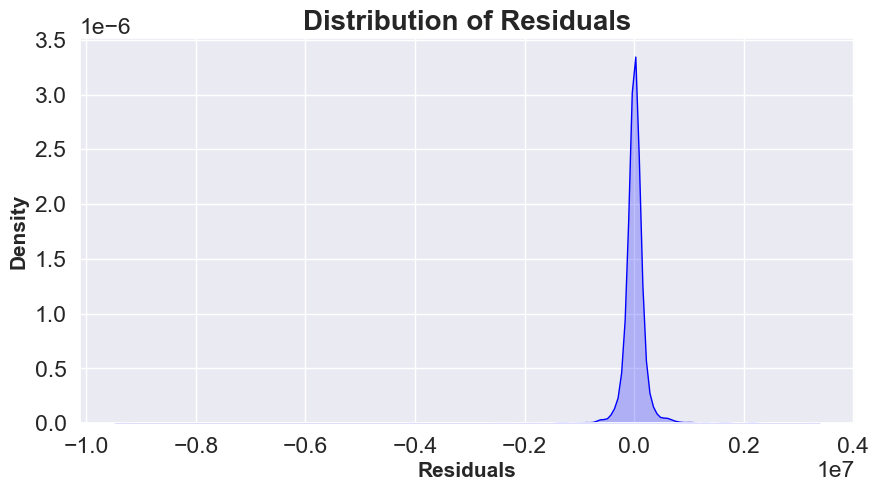

In [127]:
# Let's visualize the distribution of residuals using kde plot.
tree_residuals = y_test - tree_pred

plt.figure(figsize = (10,5))
plt.title('Distribution of Residuals', fontsize = 20, fontweight = 'bold')
sns.kdeplot(x = tree_residuals, fill = True, color = 'blue')
plt.xlabel('Residuals', fontsize = 15, fontweight = 'bold')
plt.ylabel('Density', fontsize = 15, fontweight = 'bold')
plt.show()

The distribution is almost normal which denotes that the residuals are mostly concentrated towards zero.

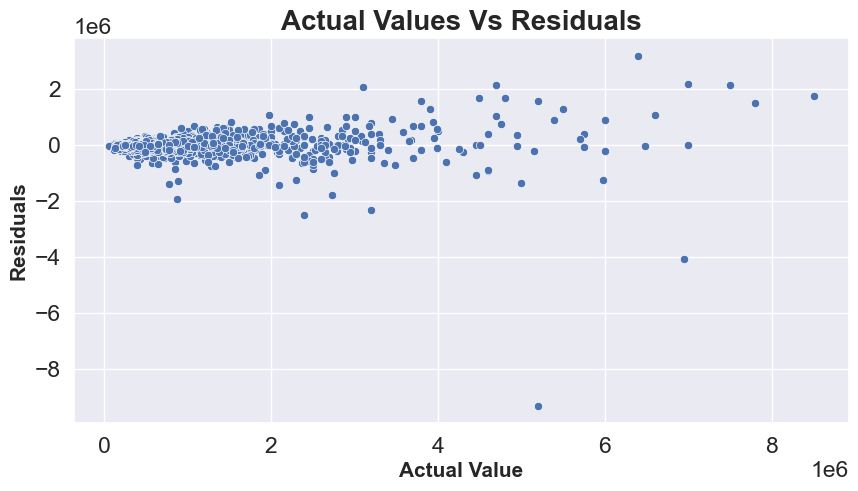

In [128]:
# Let's visualize Residuals Vs Actual Values using scatter plot.
plt.figure(figsize = (10,5))
plt.title('Actual Values Vs Residuals', fontsize = 20, fontweight = 'bold')
sns.scatterplot(x = y_test, y = tree_residuals, palette = 'plasma')
plt.xlabel('Actual Value', fontsize = 15, fontweight = 'bold')
plt.ylabel('Residuals', fontsize = 15, fontweight = 'bold')
plt.show()

The datapoints are mostly concentrated towards residuals = 0 which denotes that the actual values & predicted values are mostly the same.

In [129]:
# Random Forest Regressor.
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [130]:
rf_pred = rf_reg.predict(X_test)

In [131]:
# Compare Actual & Predicted Values.
rf_compare_df = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values' : rf_pred
})
rf_compare_df.head()

Actual Values  Predicted Values
4093          680000      5.731402e+05
10766         350000      3.451500e+05
10375         675000      7.909058e+05
3774         7500000      5.928328e+06
8779          449000      6.435967e+05

In [132]:
# Evaluate the model performance.
rf_score_train = rf_reg.score(X_train,y_train)
rf_score_test  = rf_reg.score(X_test,y_test)

print(f'Score of Training Data : {rf_score_train}')
print(f'Score of Testing Data  : {rf_score_test}')

rf_r2_score_train = r2_score(y_train,rf_reg.predict(X_train))
rf_r2_score_test  = r2_score(y_test,rf_reg.predict(X_test))

print(f'R2 Score of Training Data : {rf_r2_score_train}')
print(f'R2 Score of Testing Data  : {rf_r2_score_test}')

rf_adj_r2_score_train = 1 - (((1 - rf_r2_score_train) * (len(y_train) - 1))/(len(y_train) - X_train.shape[1] - 1))
rf_adj_r2_score_test  = 1 - (((1 - rf_r2_score_test) * (len(y_test) - 1))/(len(y_test) - X_test.shape[1] - 1))

print(f'Adj R2 Score of Training Data : {rf_adj_r2_score_train}')
print(f'Adj R2 Score of Testing Data : {rf_adj_r2_score_test}')

rf_mean_squared_err = mean_squared_error(y_test, rf_reg.predict(X_test))
print(f'Mean Squared Error : {rf_mean_squared_err}')

rf_rmse = np.sqrt(rf_mean_squared_err)
print(f'Root Mean Squared Error : {rf_rmse}')

rf_mae = mean_absolute_error(y_test,rf_reg.predict(X_test))
print(f'Mean Absolute Error : {rf_mae}')

Score of Training Data : 0.9832590778250061
Score of Testing Data  : 0.9098800764957395
R2 Score of Training Data : 0.9832590778250061
R2 Score of Testing Data  : 0.9098800764957395
Adj R2 Score of Training Data : 0.9832398353857245
Adj R2 Score of Testing Data : 0.9094642297821405
Mean Squared Error : 54794790094.45902
Root Mean Squared Error : 234082.87014315897
Mean Absolute Error : 96722.13158265881


In [133]:
# Model Training using AdaBoost Regressor.
ada_boost = AdaBoostRegressor()
ada_boost.fit(X_train,y_train)

AdaBoostRegressor()

In [134]:
ada_pred = ada_boost.predict(X_test)

In [135]:
# Compare Actual Value & Predicted Value.
ada_compare_df = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values' : ada_pred
})

ada_compare_df.head()

Actual Values  Predicted Values
4093          680000      8.028177e+05
10766         350000      7.759279e+05
10375         675000      8.417615e+05
3774         7500000      5.850250e+06
8779          449000      8.028177e+05

In [136]:
# Evaluate the model performance.
ada_score_train = ada_boost.score(X_train,y_train)
ada_score_test  = ada_boost.score(X_test,y_test)

print(f'Score of Training Data : {ada_score_train}')
print(f'Score of Testing Data  : {ada_score_test}')

ada_r2_score_train = r2_score(y_train,ada_boost.predict(X_train))
ada_r2_score_test  = r2_score(y_test,ada_boost.predict(X_test))

print(f'R2 Score of Training Data : {ada_r2_score_train}')
print(f'R2 Score of Testing Data  : {ada_r2_score_test}')

ada_adj_r2_score_train = 1 - (((1 - ada_r2_score_train) * (len(y_train) - 1))/(len(y_train) - X_train.shape[1] - 1))
ada_adj_r2_score_test  = 1 - (((1 - ada_r2_score_test) * (len(y_test) - 1))/(len(y_test) - X_test.shape[1] - 1))

print(f'Adj R2 Score of Training Data : {ada_adj_r2_score_train}')
print(f'Adj R2 Score of Testing Data : {ada_adj_r2_score_test}')

ada_mean_squared_err = mean_squared_error(y_test, ada_boost.predict(X_test))
print(f'Mean Squared Error : {ada_mean_squared_err}')

ada_rmse = np.sqrt(ada_mean_squared_err)
print(f'Root Mean Squared Error : {ada_rmse}')

ada_mae = mean_absolute_error(y_test,ada_boost.predict(X_test))
print(f'Mean Absolute Error : {ada_mae}')

Score of Training Data : 0.7609427814129202
Score of Testing Data  : 0.6408969733765271
R2 Score of Training Data : 0.7609427814129202
R2 Score of Testing Data  : 0.6408969733765271
Adj R2 Score of Training Data : 0.7606680030007511
Adj R2 Score of Testing Data : 0.6392399389754959
Mean Squared Error : 218342117935.64032
Root Mean Squared Error : 467270.9256262798
Mean Absolute Error : 357699.89104824496


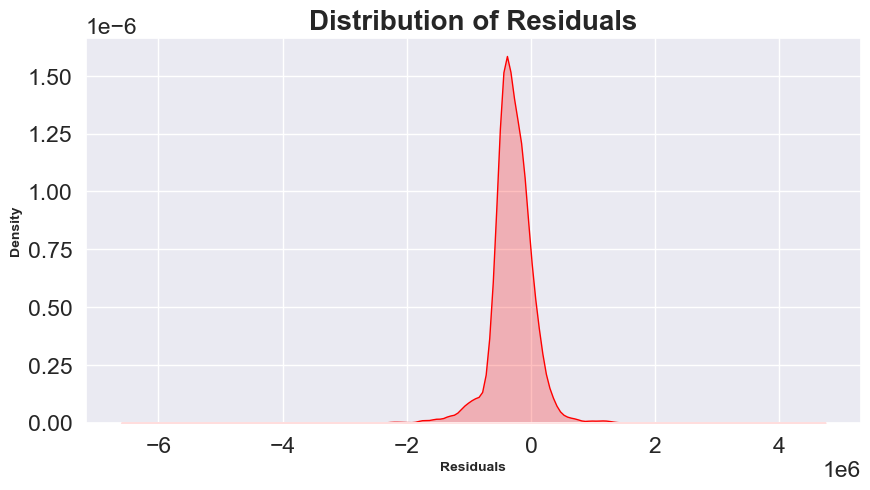

In [137]:
# Let's visualize the distribution of residuals using KDE Plot.

ada_residuals = y_test - ada_pred

plt.figure(figsize = (10,5))
plt.title('Distribution of Residuals', fontsize = 20, fontweight = 'bold')
sns.kdeplot(x = ada_residuals, color = 'red', fill = True)
plt.xlabel('Residuals', fontsize = 10, fontweight = 'bold')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold')
plt.show()

The distirbution is mostly on the negative side of zero which denotes that the model has over predicted leading to higher predicted values when compared to actual values.

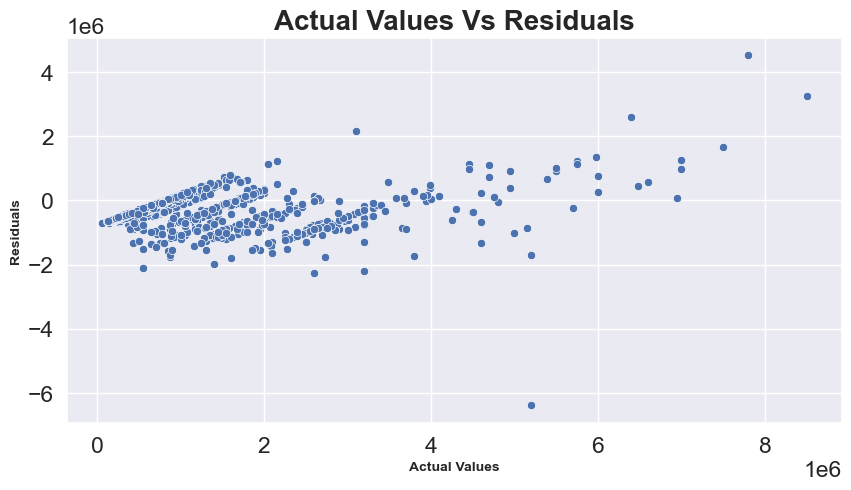

In [139]:
# Let's visualize the residuals using scatter plot.

plt.figure(figsize = (10,5))
sns.scatterplot(x = y_test, y = ada_residuals, palette='plasma')
plt.title('Actual Values Vs Residuals', fontsize = 20, fontweight = 'bold')
plt.xlabel('Actual Values', fontsize = 10, fontweight = 'bold')
plt.ylabel('Residuals', fontsize = 10, fontweight = 'bold')
plt.show()

Similar to KDE Plot, most of the residuals are less than zero which denotes that the model is overpredicting.

In [141]:
# Model Training using Gradient Boosting Regressor.
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [142]:
# Perform prediction on test data.
gb_pred = gb_reg.predict(X_test)

In [143]:
# Compare Actual & Predicted Values.
gb_compare_df = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values' : gb_pred
})
gb_compare_df.head()

Actual Values  Predicted Values
4093          680000      5.547734e+05
10766         350000      4.220762e+05
10375         675000      7.378432e+05
3774         7500000      6.034936e+06
8779          449000      6.226141e+05

In [145]:
# Evaluate the model performance.
gb_score_train = gb_reg.score(X_train,y_train)
gb_score_test  = gb_reg.score(X_test,y_test)

print(f'Score of Training Data : {gb_score_train}')
print(f'Score of Testing Data  : {gb_score_test}')

gb_r2_score_train = r2_score(y_train,gb_reg.predict(X_train))
gb_r2_score_test  = r2_score(y_test,gb_reg.predict(X_test))

print(f'R2 Score of Training Data : {gb_r2_score_train}')
print(f'R2 Score of Testing Data  : {gb_r2_score_test}')

gb_adj_r2_score_train = 1 - (((1 - gb_r2_score_train) * (len(y_train) - 1))/(len(y_train) - X_train.shape[1] - 1))
gb_adj_r2_score_test  = 1 - (((1 - gb_r2_score_test) * (len(y_test) - 1))/(len(y_test) - X_test.shape[1] - 1))

print(f'Adj R2 Score of Training Data : {gb_adj_r2_score_train}')
print(f'Adj R2 Score of Testing Data : {gb_adj_r2_score_test}')

gb_mean_squared_err = mean_squared_error(y_test, gb_reg.predict(X_test))
print(f'Mean Squared Error : {gb_mean_squared_err}')

gb_rmse = np.sqrt(gb_mean_squared_err)
print(f'Root Mean Squared Error : {gb_rmse}')

gb_mae = mean_absolute_error(y_test,gb_reg.predict(X_test))
print(f'Mean Absolute Error : {gb_mae}')

Score of Training Data : 0.9643394651877343
Score of Testing Data  : 0.8725869753192247
R2 Score of Training Data : 0.9643394651877343
R2 Score of Testing Data  : 0.8725869753192247
Adj R2 Score of Training Data : 0.9642984760672604
Adj R2 Score of Testing Data : 0.8719990444208955
Mean Squared Error : 77469772179.21349
Root Mean Squared Error : 278333.92207780475
Mean Absolute Error : 109893.10094953272


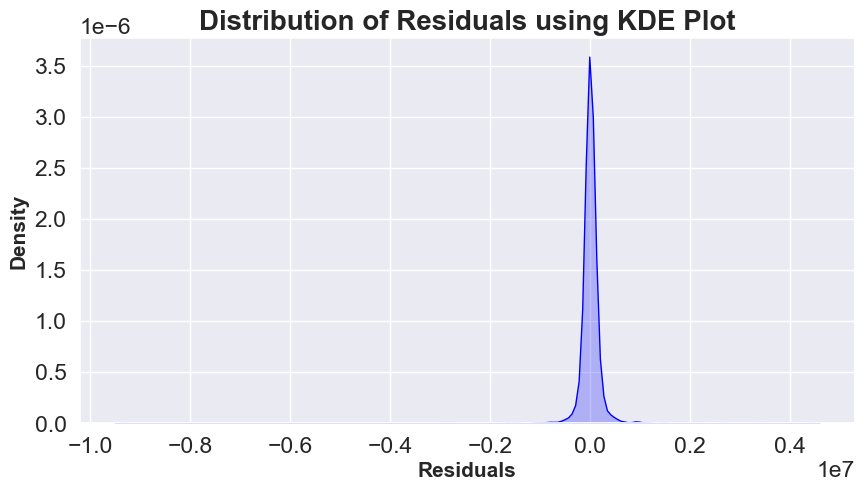

In [146]:
# Let's visualize the distribution of residuals using KDE plot.
gb_residuals = y_test - gb_reg.predict(X_test)

plt.figure(figsize = (10,5))
plt.title('Distribution of Residuals using KDE Plot', fontsize = 20, fontweight = 'bold')
sns.kdeplot(x = gb_residuals, color = 'blue', fill = True)
plt.xlabel('Residuals', fontsize = 15, fontweight = 'bold')
plt.ylabel('Density', fontsize = 15, fontweight = 'bold')
plt.show()

## Insights:

The distribution is around 0 residuals. However, there are some values that are underprdicted (residuals > 0) and overpredicted (residuals < 0).

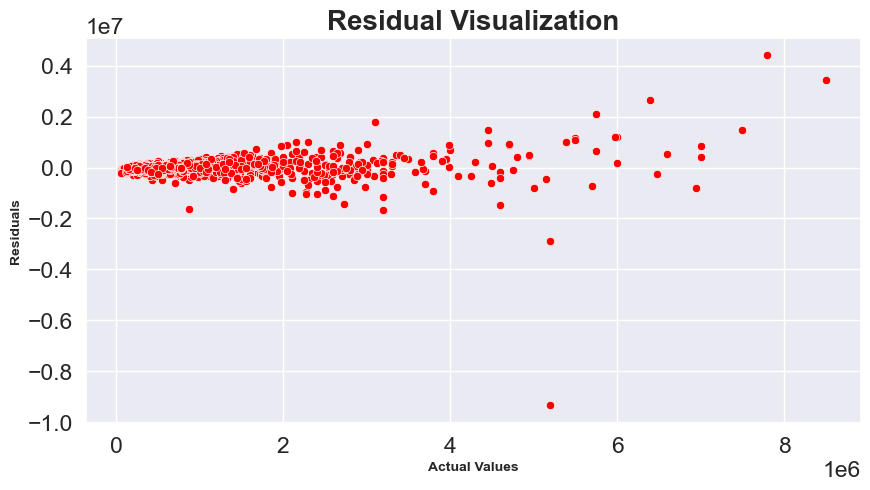

In [147]:
# Let's visualize the residuals that are underpredicted & overpredicted using scatterplot.

plt.figure(figsize = (10,5))
plt.title('Residual Visualization', fontsize = 20, fontweight = 'bold')
sns.scatterplot(x = y_test, y = gb_residuals, color = 'red')
plt.xlabel('Actual Values', fontsize = 10, fontweight = 'bold')
plt.ylabel('Residuals', fontsize = 10, fontweight = 'bold')
plt.show()

In [175]:
# Model Training using XGBoosting Regressor.
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [176]:
xgb_pred = xgb_reg.predict(X_test)

In [177]:
# Compare Actual & Predicted Values.
xgb_compare_df = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values' : xgb_pred
})
xgb_compare_df.head()

Actual Values  Predicted Values
4093          680000      6.101312e+05
10766         350000      3.652958e+05
10375         675000      7.561764e+05
3774         7500000      6.100592e+06
8779          449000      6.888767e+05

In [178]:
# Evaluate the model performance.
xgb_score_train = xgb_reg.score(X_train,y_train)
xgb_score_test  = xgb_reg.score(X_test,y_test)

print(f'Score of Training Data : {xgb_score_train}')
print(f'Score of Testing Data  : {xgb_score_test}')

xgb_r2_score_train = r2_score(y_train,xgb_reg.predict(X_train))
xgb_r2_score_test  = r2_score(y_test,xgb_reg.predict(X_test))

print(f'R2 Score of Training Data : {xgb_r2_score_train}')
print(f'R2 Score of Testing Data  : {xgb_r2_score_test}')

xgb_adj_r2_score_train = 1 - (((1 - xgb_r2_score_train) * (len(y_train) - 1))/(len(y_train) - X_train.shape[1] - 1))
xgb_adj_r2_score_test  = 1 - (((1 - xgb_r2_score_test) * (len(y_test) - 1))/(len(y_test) - X_test.shape[1] - 1))

print(f'Adj R2 Score of Training Data : {xgb_adj_r2_score_train}')
print(f'Adj R2 Score of Testing Data : {xgb_adj_r2_score_test}')

xgb_mean_squared_err = mean_squared_error(y_test, xgb_reg.predict(X_test))
print(f'Mean Squared Error : {xgb_mean_squared_err}')

xgb_rmse = np.sqrt(xgb_mean_squared_err)
print(f'Root Mean Squared Error : {xgb_rmse}')

xgb_mae = mean_absolute_error(y_test,xgb_reg.predict(X_test))
print(f'Mean Absolute Error : {xgb_mae}')

Score of Training Data : 0.9908630026682563
Score of Testing Data  : 0.9231888275735662
R2 Score of Training Data : 0.9908630026682563
R2 Score of Testing Data  : 0.9231888275735662
Adj R2 Score of Training Data : 0.9908525003724727
Adj R2 Score of Testing Data : 0.922834392367907
Mean Squared Error : 46702792305.596664
Root Mean Squared Error : 216108.2883778331
Mean Absolute Error : 94417.93274690473


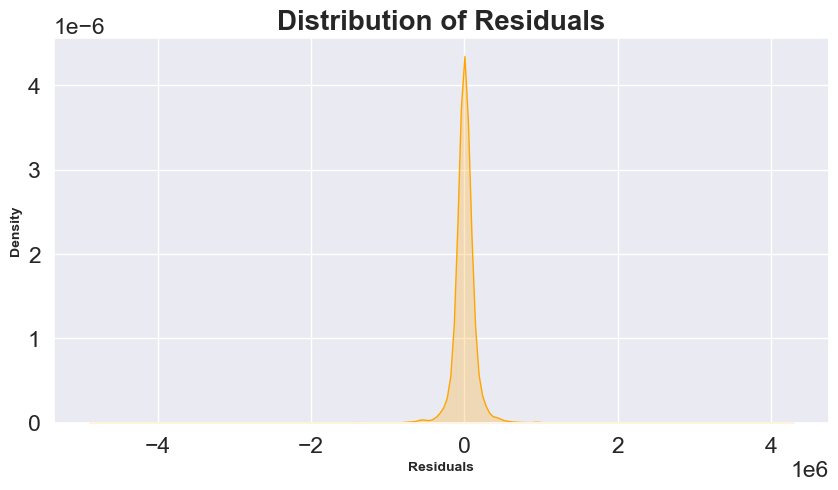

In [179]:
# Visualization of Residuals using KDE Plot.
xgb_residuals = y_test - xgb_reg.predict(X_test)

plt.figure(figsize = (10,5))
plt.title('Distribution of Residuals', fontsize = 20, fontweight = 'bold')
sns.kdeplot(x = xgb_residuals, color = 'orange', fill = True)
plt.xlabel('Residuals', fontsize = 10, fontweight = 'bold')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold')
plt.show()

## Insights:
The distribution is around 0 residuals. However, there are some values that are underprdicted (residuals > 0) and overpredicted (residuals < 0).

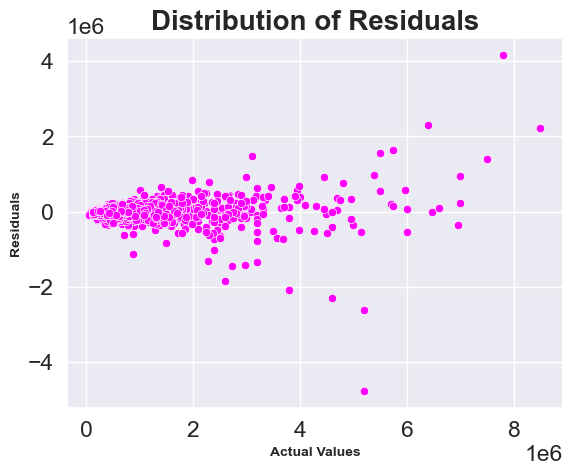

In [181]:
# Let's visualize the residuals that are underpredicted and overpredicted using scatter plot.

plt.title('Distribution of Residuals', fontsize = 20, fontweight = 'bold')
sns.scatterplot(x = y_test, y = xgb_residuals, color = 'magenta')
plt.xlabel('Actual Values', fontsize = 10, fontweight = 'bold')
plt.ylabel('Residuals', fontsize = 10, fontweight = 'bold')
plt.show()

## Out of all the above models, Random Forest Regressor, Decision Tree Regressor,  Gradient Boosting Regressor & XGBoosting Regressor are performing well with good accuracy with XGBoosting Regressor being the top performer. 

### Cross Validation Techniques

In [292]:
# Randomized Search CV for Random Forest Regressor.

rf_model_params = {
    'n_estimators' : [100,150,200,250,300],
    'criterion' : ['squared_error','absolute_error','friedman_mse','poisson'],
    'max_depth' : [2,4,6,8,10,None],
    'min_samples_split' : [2,4,6,8,10],
    'min_samples_leaf' : [20,40,60,80,100]
}
rf_model_params

{'n_estimators': [100, 150, 200, 250, 300],
 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
 'max_depth': [2, 4, 6, 8, 10, None],
 'min_samples_split': [2, 4, 6, 8, 10],
 'min_samples_leaf': [20, 40, 60, 80, 100]}

In [293]:
# Model Training using Randomized Search CV.
rf = RandomForestRegressor()
rf_random_reg = RandomizedSearchCV(estimator = rf, param_distributions=rf_model_params,scoring = 'r2', n_jobs=-1, cv = StratifiedKFold(n_splits=5))

In [294]:
# Perform Model Training.
rf_random_reg.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [2, 4, 6, 8, 10, None],
                                        'min_samples_leaf': [20, 40, 60, 80,
                                                             100],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   scoring='r2')

In [295]:
rf_random_reg.best_estimator_

RandomForestRegressor(min_samples_leaf=20, min_samples_split=4,
                      n_estimators=300)

In [296]:
rf_random_reg.best_params_

{'n_estimators': 300,
 'min_samples_split': 4,
 'min_samples_leaf': 20,
 'max_depth': None,
 'criterion': 'squared_error'}

In [297]:
rf_random_reg.best_score_

0.8293784618973815

In [298]:
# Randomized Search CV for Decision Tree Regressor.
tree_model_params = {
    'criterion' : ['squared_error','absolute_error','friedman_mse','poisson'],
    'splitter' : ['best','random'],
    'max_depth' : [2,4,6,8,10,None],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf' : [20,40,60,80,100],
    'max_features' : [14,'sqrt','log2']
}
tree_model_params

{'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
 'splitter': ['best', 'random'],
 'max_depth': [2, 4, 6, 8, 10, None],
 'min_samples_split': [2, 4, 6, 8, 10],
 'min_samples_leaf': [20, 40, 60, 80, 100],
 'max_features': [14, 'sqrt', 'log2']}

In [299]:
# Model Training using Randomized Search CV.
tree = DecisionTreeRegressor()
tree_random_reg = RandomizedSearchCV(estimator=tree,param_distributions=tree_model_params,scoring='r2',n_jobs=-1,cv=StratifiedKFold(n_splits=5))

In [300]:
tree_random_reg

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [2, 4, 6, 8, 10, None],
                                        'max_features': [14, 'sqrt', 'log2'],
                                        'min_samples_leaf': [20, 40, 60, 80,
                                                             100],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'splitter': ['best', 'random']},
                   scoring='r2')

In [301]:
tree_random_reg.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [2, 4, 6, 8, 10, None],
                                        'max_features': [14, 'sqrt', 'log2'],
                                        'min_samples_leaf': [20, 40, 60, 80,
                                                             100],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'splitter': ['best', 'random']},
                   scoring='r2')

In [302]:
tree_random_reg.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4, max_features=14,
                      min_samples_leaf=40, min_samples_split=10)

In [303]:
tree_random_reg.best_params_

{'splitter': 'best',
 'min_samples_split': 10,
 'min_samples_leaf': 40,
 'max_features': 14,
 'max_depth': 4,
 'criterion': 'friedman_mse'}

In [304]:
tree_random_reg.best_score_

0.7523604713741545

In [148]:
# Randomized Search CV for Gradient Boosting Regressor.
gb_params = {
    'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'learning_rate' : [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'n_estimators' : [80, 100, 120, 140, 150],
    'criterion' : ['friedman_mse', 'squared_error'],
    'max_depth' : [2,3,4,5,6,9]
}
gb_params

{'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
 'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'n_estimators': [80, 100, 120, 140, 150],
 'criterion': ['friedman_mse', 'squared_error'],
 'max_depth': [2, 3, 4, 5, 6, 9]}

In [149]:
gb_rand_cv = RandomizedSearchCV(estimator=GradientBoostingRegressor(),param_distributions=gb_params,n_iter=100,scoring='r2',cv=StratifiedKFold(n_splits=5))
gb_rand_cv

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=GradientBoostingRegressor(), n_iter=100,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [2, 3, 4, 5, 6, 9],
                                        'n_estimators': [80, 100, 120, 140,
                                                         150]},
                   scoring='r2')

In [150]:
# Perform Training.
gb_rand_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=GradientBoostingRegressor(), n_iter=100,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [2, 3, 4, 5, 6, 9],
                                        'n_estimators': [80, 100, 120, 140,
                                                         150]},
                   scoring='r2')

In [151]:
gb_rand_cv.best_estimator_

GradientBoostingRegressor(criterion='squared_error', max_depth=6,
                          n_estimators=140)

In [152]:
gb_rand_cv.best_params_

{'n_estimators': 140,
 'max_depth': 6,
 'loss': 'squared_error',
 'learning_rate': 0.1,
 'criterion': 'squared_error'}

In [153]:
gb_rand_cv.best_score_

0.9035599089152232

In [154]:
# Retrain Gradient Boosting Regressor model.

gb_reg_cv = GradientBoostingRegressor(n_estimators = 140,
                                   max_depth= 6,
                                   loss = 'squared_error',
                                   learning_rate = 0.1,
                                   criterion = 'squared_error')

gb_reg_cv.fit(X_train,y_train)

GradientBoostingRegressor(criterion='squared_error', max_depth=6,
                          n_estimators=140)

In [155]:
# Perform Prediction.
gb_pred_cv = gb_reg_cv.predict(X_test)

In [156]:
# Compare Actual & Predicted Values.
gb_cv_compare_df = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values' : gb_pred_cv
})
gb_cv_compare_df.head()

Actual Values  Predicted Values
4093          680000      5.686581e+05
10766         350000      3.711834e+05
10375         675000      7.487222e+05
3774         7500000      6.222407e+06
8779          449000      6.495714e+05

In [157]:
# Evaluate the model performance.
gb_cv_score_train = gb_reg_cv.score(X_train,y_train)
gb_cv_score_test  = gb_reg_cv.score(X_test,y_test)

print(f'Score of Training Data : {gb_cv_score_train}')
print(f'Score of Testing Data  : {gb_cv_score_test}')

gb_cv_r2_score_train = r2_score(y_train,gb_reg_cv.predict(X_train))
gb_cv_r2_score_test  = r2_score(y_test,gb_reg_cv.predict(X_test))

print(f'R2 Score of Training Data : {gb_cv_r2_score_train}')
print(f'R2 Score of Testing Data  : {gb_cv_r2_score_test}')

gb_cv_adj_r2_score_train = 1 - (((1 - gb_cv_r2_score_train) * (len(y_train) - 1))/(len(y_train) - X_train.shape[1] - 1))
gb_cv_adj_r2_score_test  = 1 - (((1 - gb_cv_r2_score_test) * (len(y_test) - 1))/(len(y_test) - X_test.shape[1] - 1))

print(f'Adj R2 Score of Training Data : {gb_cv_adj_r2_score_train}')
print(f'Adj R2 Score of Testing Data : {gb_cv_adj_r2_score_test}')

gb_cv_mean_squared_err = mean_squared_error(y_test, gb_reg_cv.predict(X_test))
print(f'Mean Squared Error : {gb_cv_mean_squared_err}')

gb_cv_rmse = np.sqrt(gb_cv_mean_squared_err)
print(f'Root Mean Squared Error : {gb_cv_rmse}')

gb_cv_mae = mean_absolute_error(y_test,gb_reg_cv.predict(X_test))
print(f'Mean Absolute Error : {gb_cv_mae}')

Score of Training Data : 0.9883478886761519
Score of Testing Data  : 0.904568180013033
R2 Score of Training Data : 0.9883478886761519
R2 Score of Testing Data  : 0.904568180013033
Adj R2 Score of Training Data : 0.9883344954447452
Adj R2 Score of Testing Data : 0.9041278222411748
Mean Squared Error : 58024533767.728355
Root Mean Squared Error : 240882.82165345116
Mean Absolute Error : 94707.05919325387


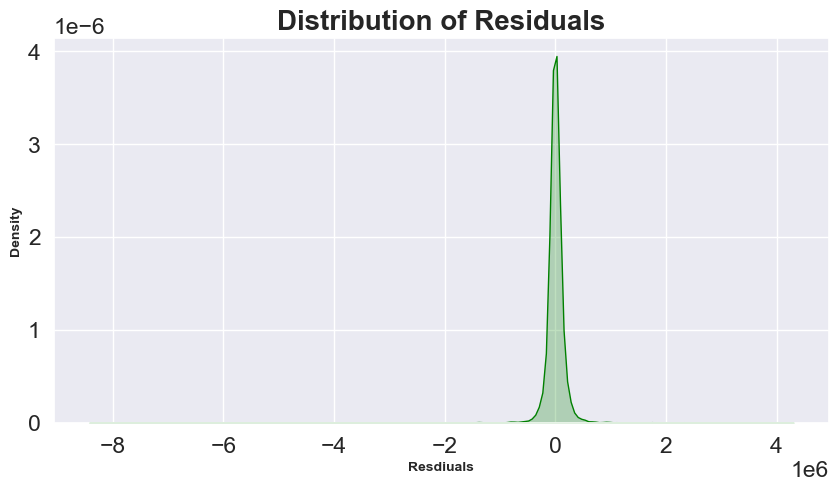

In [159]:
# Let's visualize the distribution of residuals using KDE plot.
gb_cv_residuals = y_test - gb_reg_cv.predict(X_test)

plt.figure(figsize = (10,5))
plt.title('Distribution of Residuals', fontsize = 20, fontweight = 'bold')
sns.kdeplot(x = gb_cv_residuals, color = 'green', fill = True)
plt.xlabel('Resdiuals', fontsize = 10, fontweight = 'bold')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold')
plt.show()

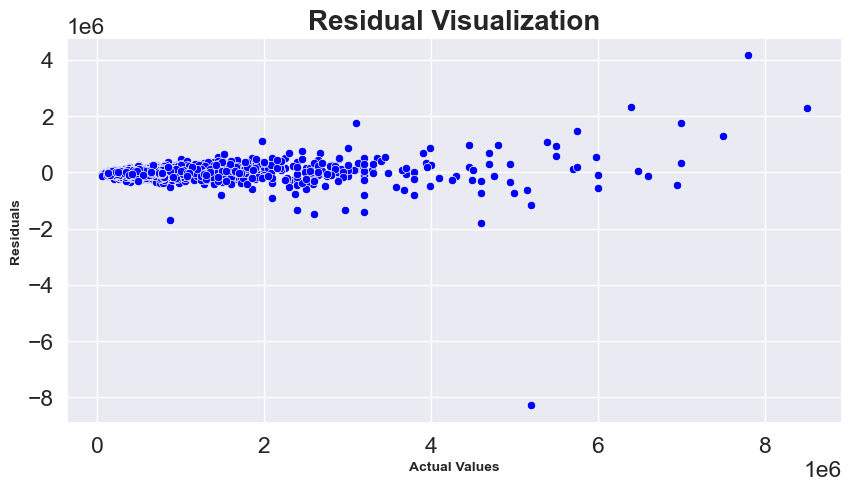

In [160]:
# Let's visualize the residuals that are underpredicted & overpredicted using scatterplot.

plt.figure(figsize = (10,5))
plt.title('Residual Visualization', fontsize = 20, fontweight = 'bold')
sns.scatterplot(x = y_test, y = gb_cv_residuals, color = 'blue')
plt.xlabel('Actual Values', fontsize = 10, fontweight = 'bold')
plt.ylabel('Residuals', fontsize = 10, fontweight = 'bold')
plt.show()

In [182]:
# Randomized Search CV for XGBoosting Regressor.
xgb_params = {
    'learning_rate' : [0.05,0.1,0.15,0.2,0.25,0.3],
    'max_depth' : [2,3,4,5,6,9],
    'n_estimators' : [100,200,250,300],
    'colsample_bytree' : [0.1,0.2,0.4,0.6,0.8,1]
}
xgb_params

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [2, 3, 4, 5, 6, 9],
 'n_estimators': [100, 200, 250, 300],
 'colsample_bytree': [0.1, 0.2, 0.4, 0.6, 0.8, 1]}

In [183]:
# Applying Randomized Search CV.
xgb_reg_rand = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=xgb_params, n_iter=100, scoring='r2', cv=StratifiedKFold(n_splits=5))
xgb_reg_rand

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          gr...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=100,
                   param_distributions={'colsample_bytree': [0.1, 0.2, 0.4, 0.6,
                                                             0.8, 1],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [2, 3, 4, 5, 6, 9],
                                        'n_estimators': [100, 200, 250, 300]},
                   scoring='r2')

In [184]:
# Train the model to identify best hyperparameters.
xgb_reg_rand.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          gr...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=100,
                   param_distributions={'colsample_bytree': [0.1, 0.2, 0.4, 0.6,
                                                             0.8, 1],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [2, 3, 4, 5, 6, 9],
                                        'n_estimators': [100, 200, 250, 300]},
                   scoring='r2')

In [185]:
# Get the best score.
xgb_reg_rand.best_score_

0.8956866784609705

In [186]:
# Get the best estimator.
xgb_reg_rand.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.3, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [187]:
# Get the best parameters.
xgb_reg_rand.best_params_

{'n_estimators': 300,
 'max_depth': 4,
 'learning_rate': 0.3,
 'colsample_bytree': 0.6}

In [188]:
# Retrain XGBoosting Regressor with hyperparameters.
xgb_reg_cv = XGBRegressor(n_estimators = 300, max_depth = 4, learning_rate = 0.3, colsample_bytree = 0.6)
xgb_reg_cv.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.3, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [189]:
# Perform prediction.
xgb_reg_pred_cv = xgb_reg_cv.predict(X_test)

In [190]:
# Compare Actual & Predicted Values.
xgb_compare_df = pd.DataFrame({
    'Actual Values' : y_test,
    'Predicted Values' : xgb_reg_pred_cv
})
xgb_compare_df.head()

Actual Values  Predicted Values
4093          680000      6.057816e+05
10766         350000      3.624076e+05
10375         675000      7.666136e+05
3774         7500000      6.830732e+06
8779          449000      6.442432e+05

In [191]:
# Evaluate the model performance.
xgb_cv_score_train = xgb_reg_cv.score(X_train,y_train)
xgb_cv_score_test  = xgb_reg_cv.score(X_test,y_test)

print(f'Score of Training Data : {xgb_cv_score_train}')
print(f'Score of Testing Data  : {xgb_cv_score_test}')

xgb_cv_r2_score_train = r2_score(y_train,xgb_reg_cv.predict(X_train))
xgb_cv_r2_score_test  = r2_score(y_test,xgb_reg_cv.predict(X_test))

print(f'R2 Score of Training Data : {xgb_cv_r2_score_train}')
print(f'R2 Score of Testing Data  : {xgb_cv_r2_score_test}')

xgb_cv_adj_r2_score_train = 1 - (((1 - xgb_cv_r2_score_train) * (len(y_train) - 1))/(len(y_train) - X_train.shape[1] - 1))
xgb_cv_adj_r2_score_test  = 1 - (((1 - xgb_cv_r2_score_test) * (len(y_test) - 1))/(len(y_test) - X_test.shape[1] - 1))

print(f'Adj R2 Score of Training Data : {xgb_cv_adj_r2_score_train}')
print(f'Adj R2 Score of Testing Data : {xgb_cv_adj_r2_score_test}')

xgb_cv_mean_squared_err = mean_squared_error(y_test, xgb_reg_cv.predict(X_test))
print(f'Mean Squared Error : {xgb_cv_mean_squared_err}')

xgb_cv_rmse = np.sqrt(xgb_cv_mean_squared_err)
print(f'Root Mean Squared Error : {xgb_cv_rmse}')

xgb_cv_mae = mean_absolute_error(y_test,xgb_reg_cv.predict(X_test))
print(f'Mean Absolute Error : {xgb_cv_mae}')

Score of Training Data : 0.9882248119747975
Score of Testing Data  : 0.9405164562822619
R2 Score of Training Data : 0.9882248119747975
R2 Score of Testing Data  : 0.9405164562822619
Adj R2 Score of Training Data : 0.988211277275918
Adj R2 Score of Testing Data : 0.9402419771747971
Mean Squared Error : 36167233230.44038
Root Mean Squared Error : 190176.8472512897
Mean Absolute Error : 91939.41991851197


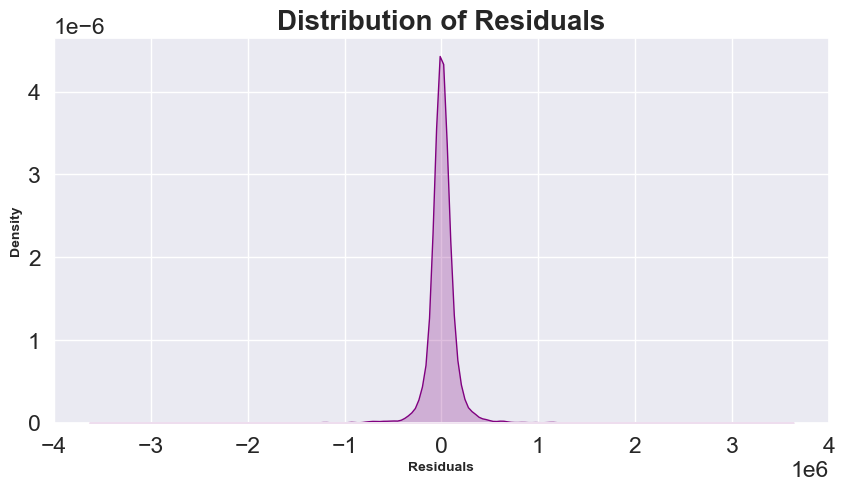

In [194]:
# Visualization of Residuals using KDE Plot.
xgb_residuals_cv = y_test - xgb_reg_cv.predict(X_test)

plt.figure(figsize = (10,5))
plt.title('Distribution of Residuals', fontsize = 20, fontweight = 'bold')
sns.kdeplot(x = xgb_residuals_cv, color = 'purple', fill = True)
plt.xlabel('Residuals', fontsize = 10, fontweight = 'bold')
plt.ylabel('Density', fontsize = 10, fontweight = 'bold')
plt.show()

The distribution of residuals is closely around 0. However, there are some data points that were underpredicted (residuals >0) and overpredicted (residuals < 0).

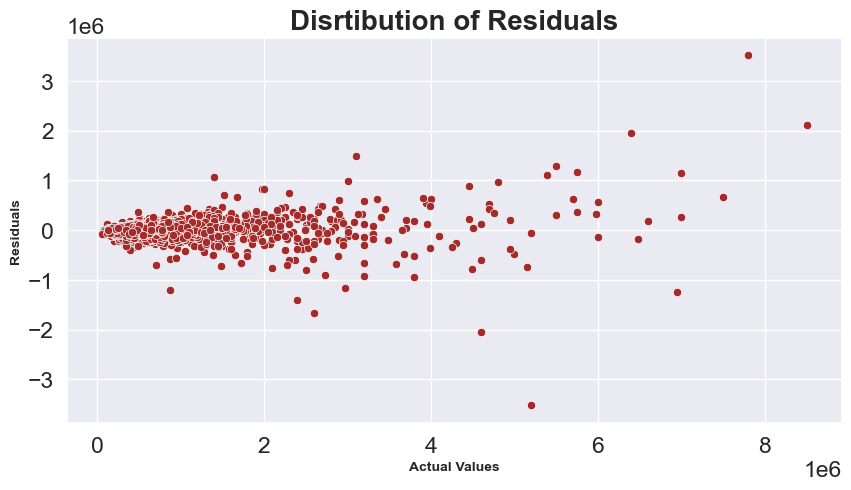

In [199]:
# Visualization of Residuals using scatter plot.

plt.figure(figsize = (10,5))
plt.title('Disrtibution of Residuals', fontsize = 20, fontweight = 'bold')
sns.scatterplot(x = y_test, y = xgb_residuals_cv, color = 'brown')
plt.xlabel('Actual Values', fontsize = 10, fontweight = 'bold')
plt.ylabel('Residuals', fontsize = 10, fontweight = 'bold')
plt.show()

## Insights:

After applying CV techniques for both Decision Tree & Random Forest Classifier, the accuracies are reduced when compared to the models that were trained with default hyper parameters. However, the accuracy of Gradient Boosting Regressor & XGBoosting Regressor have increased after applying CV technique. Hence, we will use XG Boosting regressor model for this use case as it has comparatively higher accuracy.

## Prediction of New Data using XGBoosting Regressor.

In [200]:
# Target Encoder - target_enc
# One Hot Encoder - oh_enc
# Standard Scaler - std_scaler
# XGBoosting Regressor - xgb_reg_cv

new_df = pd.DataFrame({
    'model' : ['Alto'],
    'vehicle_age' : [9],
    'km_driven' : [80000],
    'seller_type' : ['Dealer'],
    'fuel_type' : ['Petrol'],
    'transmission_type' : ['Manual'],
    'mileage' : [18.75],
    'engine' : [850],
    'max_power' : [55.40],
    'seats' : [5]
})
new_df

model  vehicle_age  km_driven seller_type fuel_type transmission_type  \
0  Alto            9      80000      Dealer    Petrol            Manual   

   mileage  engine  max_power  seats  
0    18.75     850       55.4      5

In [201]:
# Perform target encoding for model feature.
new_df_encoded = target_enc.transform(new_df)
new_df_encoded

model  vehicle_age  km_driven seller_type fuel_type  \
0  242548.387097            9      80000      Dealer    Petrol   

  transmission_type  mileage  engine  max_power  seats  
0            Manual    18.75     850       55.4      5

In [202]:
# Perform One Hot Encoding for categorical features.
ohe_encoded_array = oh_enc.transform(new_df_encoded[['seller_type','fuel_type','transmission_type']]).toarray()
ohe_encoded_array

# To convert one hot encoded array to dataframe.
ohe_encoded_df = pd.DataFrame(ohe_encoded_array, columns = oh_enc.get_feature_names_out(['seller_type','fuel_type','transmission_type']))
ohe_encoded_df

seller_type_Individual  seller_type_Trustmark Dealer  fuel_type_Diesel  \
0                       0                             0                 0   

   fuel_type_Electric  fuel_type_LPG  fuel_type_Petrol  \
0                   0              0                 1   

   transmission_type_Manual  
0                         1

In [203]:
# Drop categorical features which are already encoded.
new_df_encoded = new_df_encoded.drop(columns = ['seller_type','fuel_type','transmission_type'], axis = 1)
new_df_encoded

model  vehicle_age  km_driven  mileage  engine  max_power  seats
0  242548.387097            9      80000    18.75     850       55.4      5

In [204]:
# Concatenate ohe_encoded_df & new_df_encoded dataframes.
new_df_encoded = pd.concat([new_df_encoded,ohe_encoded_df], axis = 1)
new_df_encoded

model  vehicle_age  km_driven  mileage  engine  max_power  seats  \
0  242548.387097            9      80000    18.75     850       55.4      5   

   seller_type_Individual  seller_type_Trustmark Dealer  fuel_type_Diesel  \
0                       0                             0                 0   

   fuel_type_Electric  fuel_type_LPG  fuel_type_Petrol  \
0                   0              0                 1   

   transmission_type_Manual  
0                         1

In [205]:
# Standardize numerical data using standard Scaler.
new_arr_std = std_scaler.transform(new_df_encoded)
new_arr_std

array([[-9.30912728e-01,  9.73507396e-01,  1.03118507e+05,
        -2.23692599e-01, -1.21473574e+00, -1.04271676e+00,
        -4.01479878e-01, -7.64045963e-01, -1.06591517e-01,
        -9.53596933e-01, -1.28073628e-02, -5.28755398e-02,
         9.95663360e-01,  5.12526863e-01]])

In [168]:
# Predict the selling_price using Gradient boosting regressor model.
selling_price = gb_reg_cv.predict(new_arr_std)
selling_price

array([226724.45033197])

In [206]:
# Predict the selling_price using XGBoosting regressor model.
selling_price = xgb_reg_cv.predict(new_arr_std)
selling_price

array([92479.74], dtype=float32)

In [169]:
# Predict the selling_price using random forest regressor model.
selling_price = rf_reg.predict(new_arr_std)
selling_price

array([220370.])

In [170]:
# Predict the selling price using Decision Tree model.
selling_price_tree = tree_reg.predict(new_arr_std)
selling_price_tree

array([200000.])

In [171]:
car_df_copy.head()

model  vehicle_age  km_driven seller_type fuel_type transmission_type  \
0      Alto            9     120000  Individual    Petrol            Manual   
1     Grand            5      20000  Individual    Petrol            Manual   
2       i20           11      60000  Individual    Petrol            Manual   
3      Alto            9      37000  Individual    Petrol            Manual   
4  Ecosport            6      30000      Dealer    Diesel            Manual   

   mileage  engine  max_power  seats  selling_price  
0    19.70     796      46.30      5         120000  
1    18.90    1197      82.00      5         550000  
2    17.00    1197      80.00      5         215000  
3    20.92     998      67.10      5         226000  
4    22.77    1498      98.59      5         570000

In [172]:
new_df

model  vehicle_age  km_driven seller_type fuel_type transmission_type  \
0  Alto            9      80000      Dealer    Petrol            Manual   

   mileage  engine  max_power  seats  
0    18.75     850       55.4      5

In [ ]:
# Descriptive stats - mean, median, mode, min, max, variance, std, quartiles (box plot), histplot/distplot/kdeplot,
#                     skewness, Covariance, Pearson correlation (linear), Spearman rank correlation(non-linear).
# Analyze each feature with unique(), nunique(), value_counts(), countplot, groupby , agg, where, having.
# kde plot.
# outlier detection.
# Bar plot (Vs features)
# Train Test Split.
# Correlation (to check for multicollinearity)
# Encoding & Scaling through column transformer.
# Model Training (Dummy Regressor, Linear, Decision Tree Regressor, Random Forest Regressor)
# Hyper parameter tuning through Grid Search CV & Randomized Search CV.
# Model Training with hyper parameters.
# Model Evaluation.
# Prediction of new data points.
# Model Pickling.
# Model deployment in web.
# Upload to Github.

In [ ]:
# Points to Note:
# 1. By default, value_counts() is in descending order.
# 2. Standardization needs to be done post all kinds of encoding techniques and just before model training. It can be 
#    standardized for all the features (be it encoded or non-encoded).